# Loan Prediction Based on Customer Behavior

## A. Role

Sebagai tim Data Scientist menggunakan pengetahuan dan keterampilan analisis data untuk memahami tren dan pola dalam dataset pinjaman. Bertanggung jawab untuk mengembangkan model prediksi yang dapat mengidentifikasi pelanggan yang berisiko default pada pinjaman berdasarkan fitur-fitur seperti pendapatan, usia, pengalaman, dan karakteristik lainnya. Selain itu, Data Scientist juga bertugas untuk menganalisis faktor-faktor yang mempengaruhi risiko default dan menghasilkan wawasan yang berguna bagi tim manajemen atau tim pengambil keputusan dalam mengelola portofolio pinjaman. Dengan menggunakan pendekatan analisis data dan teknik machine learning, Data Scientist berperan dalam membantu perusahaan atau institusi keuangan mengoptimalkan keputusan kredit dan mengurangi risiko gagal bayar dalam portofolio pinjamannya.

## B. Problem Statement

### Summary of The Problem

Organisasi ingin memprediksi pelanggan yang berpotensi mangkir untuk produk pinjaman konsumen berdasarkan data perilaku pelanggan historis yang mereka amati. Dengan demikian, mereka dapat mengidentifikasi pelanggan baru yang lebih berisiko dan mengambil tindakan proaktif untuk mengelola risiko default.

### Supporting Facts

- Menurut laporan industri keuangan, risiko default pelanggan dapat menyebabkan kerugian besar bagi perusahaan, terutama jika tidak dideteksi secara dini.
- Penelitian menunjukkan bahwa menggunakan teknik analisis data dan machine learning dapat membantu mengidentifikasi pola dan tren yang berkaitan dengan risiko default pelanggan.

### Problem Statement

- Menentukan apakah seorang pelanggan berisiko default pada pinjaman berdasarkan perilaku dan karakteristiknya.
- Membuat model prediksi untuk mengidentifikasi pelanggan yang berpotensi gagal membayar pinjaman.
- Menganalisis faktor-faktor yang mempengaruhi risiko default pada pinjaman.
- Menentukan apakah ada korelasi antara variabel seperti pendapatan, usia, atau pengalaman dengan risiko default pada pinjaman.

## Goal And Objective

### Goal 

Mengurangi risiko gagal bayar dalam portofolio pinjaman dan meningkatkan kualitas keputusan kredit dengan menggunakan analisis data dan model prediksi.

### Objectiveness

- Membangun model prediksi yang dapat mengidentifikasi pelanggan yang berpotensi default pada pinjaman dengan akurasi tinggi.
- Meningkatkan pemahaman tentang faktor-faktor yang mempengaruhi risiko default melalui analisis data yang mendalam.
- Mengoptimalkan keputusan kredit dengan menggunakan model prediksi untuk menilai risiko default pada setiap aplikasi pinjaman.
- Mengurangi kerugian finansial dan meningkatkan kepercayaan pelanggan dengan mengelola risiko default secara proaktif.

## Business Metrics

- Rasio Default Pinjaman Konsumen: Persentase dari total pinjaman konsumen yang gagal bayar dalam portofolio pinjaman. Metric ini membantu dalam melacak apakah jumlah pelanggan yang mangkir berkurang sesuai dengan tujuan untuk mengurangi risiko gagal bayar.
- Tingkat Akurasi Model Prediksi: Persentase dari prediksi model yang benar dari total prediksi yang dilakukan oleh model. Metric ini membantu dalam mengevaluasi seberapa baik model dapat mengidentifikasi pelanggan yang berpotensi mangkir dengan akurat.
- Presisi dan Recall Model: Persentase presisi (positif prediksi yang benar) dan recall (kasus positif yang diidentifikasi) dari model prediksi. Metric ini membantu dalam mengevaluasi seberapa baik model dapat mengelola risiko mangkir dengan mengoptimalkan jumlah pelanggan yang benar-benar berisiko mangkir dan meminimalkan jumlah pelanggan yang tidak terdeteksi sebagai berisiko mangkir.
- Peningkatan Pendapatan Pinjaman: Metric ini membantu dalam mengevaluasi dampak positif dari berkurangnya total pinjaman konsumen yang gagal bayar.

In [24]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import sklearn.preprocessing as pp
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [25]:
def numerical_plot(data, col, title, simb, ylabel, color):
    fig, ax = plt.subplots(
        2, 1,
        sharex= True,
        figsize= (20, 8),
        facecolor= "#FFFFFF",
        gridspec_kw= {"height_ratios": (.2, .8)}
    )
    
    ax[0].set_facecolor("#FFFFFF")
    ax[1].set_facecolor("#FFFFFF")
    
    ax[0].set_title(
        title,
        weight= "bold",
        fontsize= 30,
        pad= 30,
    )
    
    sns.boxplot(
        x= col,
        data= data,
        color= color,
        ax= ax[0],
    )
    
    ax[0].set(yticks= [])
    
    sns.distplot(data[col], kde= True, color= color)
    
    plt.xticks(weight= "bold", fontsize= 10)
    plt.yticks(weight= "bold", fontsize= 10)
    
    ax[0].set_xlabel(col, weight= "bold", fontsize= 15, labelpad= 15)
    ax[1].set_xlabel(col, weight= "bold", fontsize= 15)
    ax[1].set_ylabel(ylabel, weight= "bold", fontsize= 15)
    
    plt.axvline(
        data[col].mean(),
        color= "darkblue",
        linewidth= 2.2,
        label= "mean=" + str(np.round(data[col].mean(), 1)) + simb,
    )
    
    plt.axvline(
        data[col].median(),
        color= "red",
        linewidth= 2.2,
        label= "median=" + str(np.round(data[col].median(), 1)) + simb,
    )
    
    plt.axvline(
        data[col].max(),
        color= "blue",
        linewidth= 2.2, 
        label= "max=" + str(np.round(data[col].max(), 1)) + simb,
    )
    
    plt.axvline(
        data[col].min(), 
        color= "orange", 
        linewidth= 2.2, 
        label= "min=" + str(np.round(data[col].min(), 1)) + simb,
    ) 
    plt.axvline(
        data[col].mode()[0], 
        color= "purple", 
        linewidth= 2.2, 
        label= "mode=" + str(data[col].mode()[0]) + simb,
    )
    
    plt.legend(
        bbox_to_anchor= (1, 1),
        ncol= 1,
        fontsize= 17,
        fancybox= True,
        shadow= True,
        frameon= False,
    )
    
    plt.tight_layout()
    plt.show()

In [26]:
def count_pie_plot(
    datapie, datacount, colpiey, colcount, text1, text2,
    piecomap, xlabel, ylabel, xticklabel, yticklabel, ystart,
    yend, pielabels, yplus, piefs=10, countcomap=None,
    pctdistance=.65, fontsize=30, xtickrotation=None,
):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, nrows=1,
        facecolor="#FFFFFF",
        figsize=(24, 8)
    )
    
    datapie.plot(
        kind="pie",
        y=colpiey,
        autopct="%1.1f%%",
        labels=None,
        startangle=90,
        colors=piecomap,
        wedgeprops=dict(width=.15),
        pctdistance=pctdistance,
        fontsize=piefs,
        ax=ax1,
        textprops=dict(color="black", weight="bold")
    )
    
    sns.countplot(
        x=colcount,
        data=datacount,
        palette=countcomap,
        ax=ax2
    )
    
    x0, x1 = ax1.get_xlim()
    y0, y1 = ax1.get_ylim()
    
    ax1.text(
        x0, y1 * 1.40,
        text1, fontsize=fontsize,
        ha="left", va="center",
        weight="bold",
    )
    
    ax1.text(
        x0, y1 * 1.25,
        text2, fontsize=18,
        ha="left", va="center",
    )
    
    ax1.legend(
        pielabels, loc="upper left",
        bbox_to_anchor=(x0 * .01, y1 * .85),
        prop={"size": 15}, frameon=False,
        ncol=len(datapie)
    )
    
    ax2.set_xlabel(
        xlabel, weight="bold",
        labelpad=15, fontsize=15,
    )
    
    ax2.set_ylabel(
        ylabel, weight="bold",
        labelpad=15, fontsize=15,
    )
    
    ax2.set_xticklabels(
        labels=xticklabel, weight="semibold",
        fontsize=10, rotation=xtickrotation,
    )
    
    ax2.set_yticklabels(
        labels=yticklabel, weight="semibold",
        fontsize=10,
    )
    
    i = 0
    
    for p in ax2.patches:
        value = f"{p.get_height()}"
        if (i < 2):
            y1 = -2
        else:
            y1 = 2
        i += 1
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + yplus
        ax2.text(
            x, y, value, ha="center",
            va="center", fontsize=15, weight="semibold",
        )
        
    ax2.set_ylim(ystart, yend)
    ax2.set_facecolor("#FFFFFF")
    ax1.set_ylabel(None)
   
    plt.tight_layout()
    return fig


In [27]:
df = pd.read_csv('Training Data.csv')
df.sample(5)

Id   Income  Age  Experience Married/Single House_Ownership   
199219  199220  1695214   44           9         single          rented  \
165931  165932  7366947   50          10        married          rented   
202031  202032  8323780   62           8         single          rented   
49302    49303  1368608   65          13         single          rented   
21378    21379  4226060   49           2         single          rented   

       Car_Ownership        Profession            CITY           STATE   
199219           yes    Microbiologist         Dhanbad       Jharkhand  \
165931           yes  Fashion_Designer  Tadepalligudem  Andhra_Pradesh   
202031           yes          Designer           Dhule     Maharashtra   
49302             no     Civil_servant    Tiruvottiyur      Tamil_Nadu   
21378             no     Hotel_Manager           Sikar       Rajasthan   

        CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
199219                8                 10          1  
165931               10                 13          0  
202031                5                 14          0  
49302                 5                 14          0  
21378                 2                 11          1

## <font color = 'green'> Data Cleansing </font>

### A. Handling Missing Value

In [5]:
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Tidak perlu handling missing value sebab tidak ditemukan data NULL.

### B. Handling Duplicated Data

In [6]:
df.duplicated().sum()

0

Tidak ada data duplikat.

### C. Cleaning Data

In [28]:
df['CITY'] = df['CITY'].str.extract("([A-Za-z]+)")
df['STATE'] = df['STATE'].str.extract("([A-Za-z]+)")

### D. Handle Outliers

In [6]:
num_cols = df.select_dtypes(include=['int', 'float'])
num_cols.columns

Index(['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

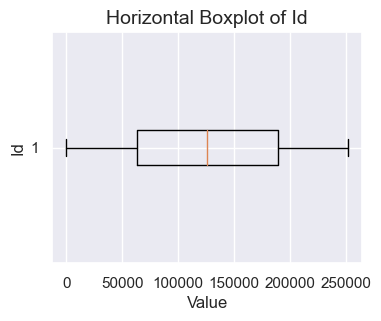

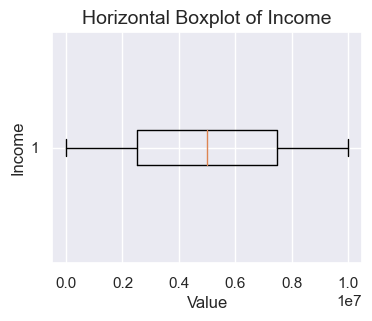

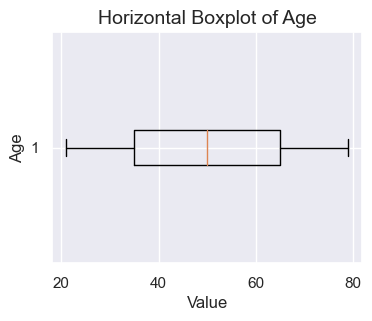

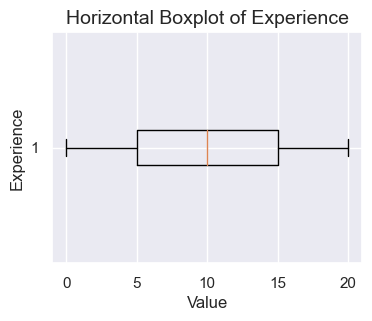

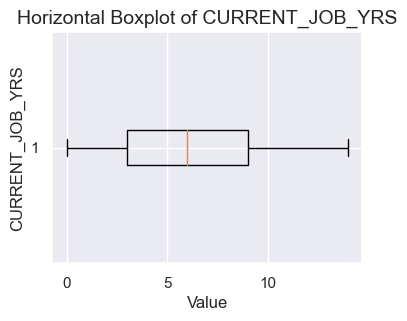

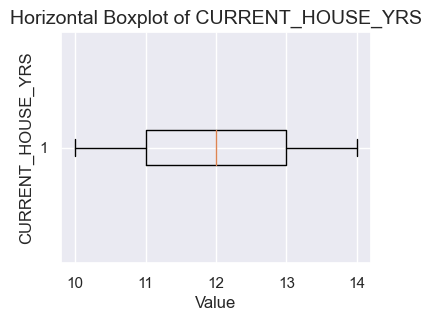

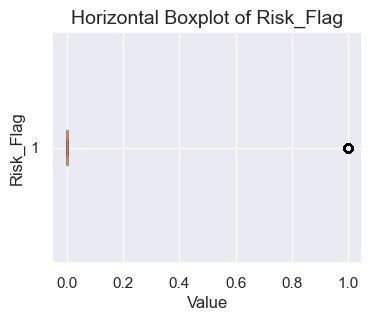

In [7]:
for col in num_cols.columns:
    plt.figure(figsize=(4, 3))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Horizontal Boxplot of {col}', fontsize=14)
    plt.xlabel('Value', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()

Tidak ada handle outlier dan akan menggunakan model yang robust terhadap outlier.

### E. Feature transformation

In [8]:
# Mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Tidak perlu feature transformation karena tipe data semua feature sudah sesuai.

### F. Feature encoding

In [29]:
label_encoder = pp.LabelEncoder()
df['Married_Single_Encode'] = label_encoder.fit_transform(df['Married/Single'])
df['Car_Ownership_Encode'] = label_encoder.fit_transform(df['Car_Ownership'])
df['House_Ownership_Encode'] = label_encoder.fit_transform(df['House_Ownership'])
df['Profession_Encode'] = label_encoder.fit_transform(df['Profession'])
df['CITY_Encode'] = label_encoder.fit_transform(df['CITY'])
df['STATE_Encode'] = label_encoder.fit_transform(df['STATE'])

Berdasarkan Chi-Square Test Categorical Columns memiliki pengaruh signifikan terhadap fitur target `Risk_Flag`.

### G. Handling class imbalance

In [8]:
df['Risk_Flag'].value_counts(normalize=True)

Risk_Flag
0    0.877
1    0.123
Name: proportion, dtype: float64

## <font color = 'green'> Feature Engineering </font>

In [30]:
def create_bins(data, num_bins):
    min_val = min(data)
    max_val = max(data)
    bin_width = (max_val - min_val) / num_bins
    bins = [min_val + i * bin_width for i in range(num_bins)]
    bins.append(max_val)  # tambahkan nilai maksimum sebagai batas atas terakhir
    return bins

In [31]:
# membuat kolom Age_Group
bins = [20, 35, 50, 65, 80]
labels = ['21-35', '36-50', '51-65', '66-79']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age_Group_Encode'] = label_encoder.fit_transform(df['Age_Group'])

In [32]:
# membuat kolom Income_Category
bins = [10310, 2008235.6, 4006161.2, 6004086.800000001,8002012.4, 9999938]
labels = ['Very Low Income', 'Low Income', 'Moderate Income', 'High Income', 'Very High Income']

df['Income_Category'] = pd.cut(df['Income'], bins=bins, labels=labels)
df['Income_Category_Enocode'] = label_encoder.fit_transform(df['Income_Category'])

In [33]:
data = [10310, 9999938]
num_bins_list = [4, 5, 6]

for num_bins in num_bins_list:
    bins = create_bins(data, num_bins)
    print(f'Number of bins: {num_bins}')
    print('Bins:')
    for i in range(len(bins) - 1):
        print(f'Bin {i+1}: {bins[i]} - {bins[i+1]}')
    print()

Number of bins: 4
Bins:
Bin 1: 10310.0 - 2507717.0
Bin 2: 2507717.0 - 5005124.0
Bin 3: 5005124.0 - 7502531.0
Bin 4: 7502531.0 - 9999938

Number of bins: 5
Bins:
Bin 1: 10310.0 - 2008235.6
Bin 2: 2008235.6 - 4006161.2
Bin 3: 4006161.2 - 6004086.800000001
Bin 4: 6004086.800000001 - 8002012.4
Bin 5: 8002012.4 - 9999938

Number of bins: 6
Bins:
Bin 1: 10310.0 - 1675248.0
Bin 2: 1675248.0 - 3340186.0
Bin 3: 3340186.0 - 5005124.0
Bin 4: 5005124.0 - 6670062.0
Bin 5: 6670062.0 - 8335000.0
Bin 6: 8335000.0 - 9999938



In [34]:
# membuat kolom Experience_Category
bins = [0, 3, 6, 10, 20]
labels = ['0-3', '3-6', '6-10', '10-20']
df['Experience_Category'] = pd.cut(df['Experience'], bins=bins, labels=labels, right=False)
df['Experience_Category_Encode'] = label_encoder.fit_transform(df['Experience_Category'])

In [35]:
# membuat kolom profession_map 
def segment_profession(profession):
    if profession in ['Mechanical_engineer', 'Design_Engineer', 'Chemical_engineer', 'Biomedical_Engineer',
                      'Computer_hardware_engineer', 'Petroleum_Engineer', 'Civil_engineer',
                      'Industrial_Engineer', 'Technology_specialist', 'Surveyor']:
        return 'Engineering'
    elif profession in ['Software_Developer', 'Technical_writer', 'Graphic_Designer', 'Web_designer']:
        return 'IT/Software'
    elif profession in ['Civil_servant', 'Politician', 'Police_officer', 'Magistrate', 'Official', 'Army_officer']:
        return 'Government'
    elif profession in ['Librarian', 'Teacher']:
        return 'Education'
    elif profession in ['Economist', 'Financial_Analyst', 'Chartered_Accountant']:
        return 'Finance/Accounting'
    elif profession in ['Flight_attendant', 'Air_traffic_controller', 'Aviator']:
        return 'Aviation'
    elif profession in ['Architect', 'Designer', 'Fashion_Designer']:
        return 'Design'
    elif profession in ['Physician', 'Dentist', 'Surgeon','Psychologist']:
        return 'Medical Practitioner'
    elif profession in ['Hotel_Manager', 'Chef']:
        return 'Hospitality'
    elif profession in['Comedian', 'Artist']:
        return 'Art'
    elif profession in ['Secretary', 'Computer_operator']:
        return 'Administration'
    elif profession in ['Technician', 'Microbiologist', 'Geologist','Scientist', 'Geologist', 'Statistician','Analyst']:
        return 'Science/Research'
    else:
        return 'Other'

df['profession_map'] = df['Profession'].apply(segment_profession)

In [36]:
df['profession_map_encode'] = label_encoder.fit_transform(df['profession_map'])

In [37]:
# membuat kolom Zone
def segment_state(state):
    if state in ['Rajasthan', 'Maharashtra', 'Gujarat']:
        return 'West Zone'
    elif state in ['Andhra_Pradesh','Kerala', 'Tamil_Nadu', 'Puducherry','Telangana','Karnataka']:
        return 'South Zone'
    elif state in ['Jammu_and_Kashmir','Himachal_Pradesh', 'Punjab','Chandigarh', 'Uttarakhand', 'Haryana','Delhi', 'Uttar_Pradesh','Uttar_Pradesh']:
        return 'North Zone'
    elif state in ['Bihar','West_Bengal','Jharkhand', 'Odisha',]:
        return 'East Zone'
    elif state in ['Chhattisgarh','Madhya_Pradesh']:
        return 'Central Zone'
    elif state in ['Sikkim','Mizoram', 'Manipur','Tripura','Arunachal Pradesh','Assam']:
        return 'North East Zone'
    else:
        return 'Unknown'

df['Zone'] = df['STATE'].apply(segment_state)

In [38]:
df['Zone_Encode'] = label_encoder.fit_transform(df['Zone'])

In [39]:
df.head(2)

Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership   
0   1  1303834   23           3         single          rented            no  \
1   2  7574516   40          10         single          rented            no   

            Profession      CITY        STATE  ...  Age_Group   
0  Mechanical_engineer      Rewa       Madhya  ...      21-35  \
1   Software_Developer  Parbhani  Maharashtra  ...      36-50   

   Age_Group_Encode  Income_Category  Income_Category_Enocode   
0                 0  Very Low Income                        4  \
1                 1      High Income                        0   

   Experience_Category  Experience_Category_Encode  profession_map   
0                  3-6                           2     Engineering  \
1                10-20                           1     IT/Software   

   profession_map_encode       Zone Zone_Encode  
0                      5    Unknown           5  
1                      9  West Zone           6  

[2 rows x 29 columns]

## <font color = 'green'> Descriptive Analysis </font>

In [40]:
numeric_cols = df.select_dtypes(include=['int', 'float'])
categorical_cols = df.select_dtypes(include=['object', 'category'])

In [20]:
# Analisis Summary Kolom Numeric
numeric_cols.describe(include='all').transpose()

count          mean           std      min   
Id                          252000.0  1.260005e+05  7.274628e+04      1.0  \
Income                      252000.0  4.997117e+06  2.878311e+06  10310.0   
Age                         252000.0  4.995407e+01  1.706385e+01     21.0   
Experience                  252000.0  1.008444e+01  6.002590e+00      0.0   
CURRENT_JOB_YRS             252000.0  6.333877e+00  3.647053e+00      0.0   
CURRENT_HOUSE_YRS           252000.0  1.199779e+01  1.399037e+00     10.0   
Risk_Flag                   252000.0  1.230000e-01  3.284379e-01      0.0   
Married_Single_Encode       252000.0  8.979048e-01  3.027741e-01      0.0   
Car_Ownership_Encode        252000.0  3.015873e-01  4.589480e-01      0.0   
House_Ownership_Encode      252000.0  1.891722e+00  3.918803e-01      0.0   
Profession_Encode           252000.0  2.527675e+01  1.472854e+01      0.0   
CITY_Encode                 252000.0  1.572185e+02  9.207391e+01      0.0   
STATE_Encode                252000.0  1.370538e+01  9.220625e+00      0.0   
Age_Group_Encode            252000.0  1.520179e+00  1.115277e+00      0.0   
Income_Category_Enocode     252000.0  1.500294e+00  1.118430e+00      0.0   
Experience_Category_Encode  252000.0  1.634210e+00  1.201782e+00      0.0   
profession_map_encode       252000.0  6.854671e+00  3.518179e+00      0.0   
Zone_Encode                 252000.0  4.186325e+00  1.678924e+00      0.0   

                                   25%        50%         75%        max  
Id                            63000.75   126000.5   189000.25   252000.0  
Income                      2503015.00  5000694.5  7477502.00  9999938.0  
Age                              35.00       50.0       65.00       79.0  
Experience                        5.00       10.0       15.00       20.0  
CURRENT_JOB_YRS                   3.00        6.0        9.00       14.0  
CURRENT_HOUSE_YRS                11.00       12.0       13.00       14.0  
Risk_Flag                         0.00        0.0        0.00        1.0  
Married_Single_Encode             1.00        1.0        1.00        1.0  
Car_Ownership_Encode              0.00        0.0        1.00        1.0  
House_Ownership_Encode            2.00        2.0        2.00        2.0  
Profession_Encode                13.00       26.0       38.00       50.0  
CITY_Encode                      77.00      156.0      237.00      315.0  
STATE_Encode                      6.00       14.0       22.00       27.0  
Age_Group_Encode                  1.00        2.0        3.00        3.0  
Income_Category_Enocode           0.00        2.0        3.00        4.0  
Experience_Category_Encode        1.00        2.0        3.00        4.0  
profession_map_encode             5.00        7.0       10.00       12.0  
Zone_Encode                       3.00        5.0        5.00        6.0

In [19]:
# Analisis Summary Kolom Categoric
categorical_cols.describe(include='all').transpose()

count unique          top    freq
Married/Single       252000      2       single  226272
House_Ownership      252000      3       rented  231898
Car_Ownership        252000      2           no  176000
Profession           252000     51    Physician    5957
CITY                 252000    316   Aurangabad    1543
STATE                252000     28        Uttar   29143
Age_Group            252000      4        66-79   64192
Income_Category      251963      4         High   63012
Experience_Category  240650      4       Expert   61118
profession_map       252000     13  Engineering   50008
Zone                 252000      7      Unknown  111195

## <font color = 'green'> Exploratory Data Analysis (EDA) </font>

### <font color = 'darkgreen'> 1. Univariate Analysis </font>

### Kolom Age

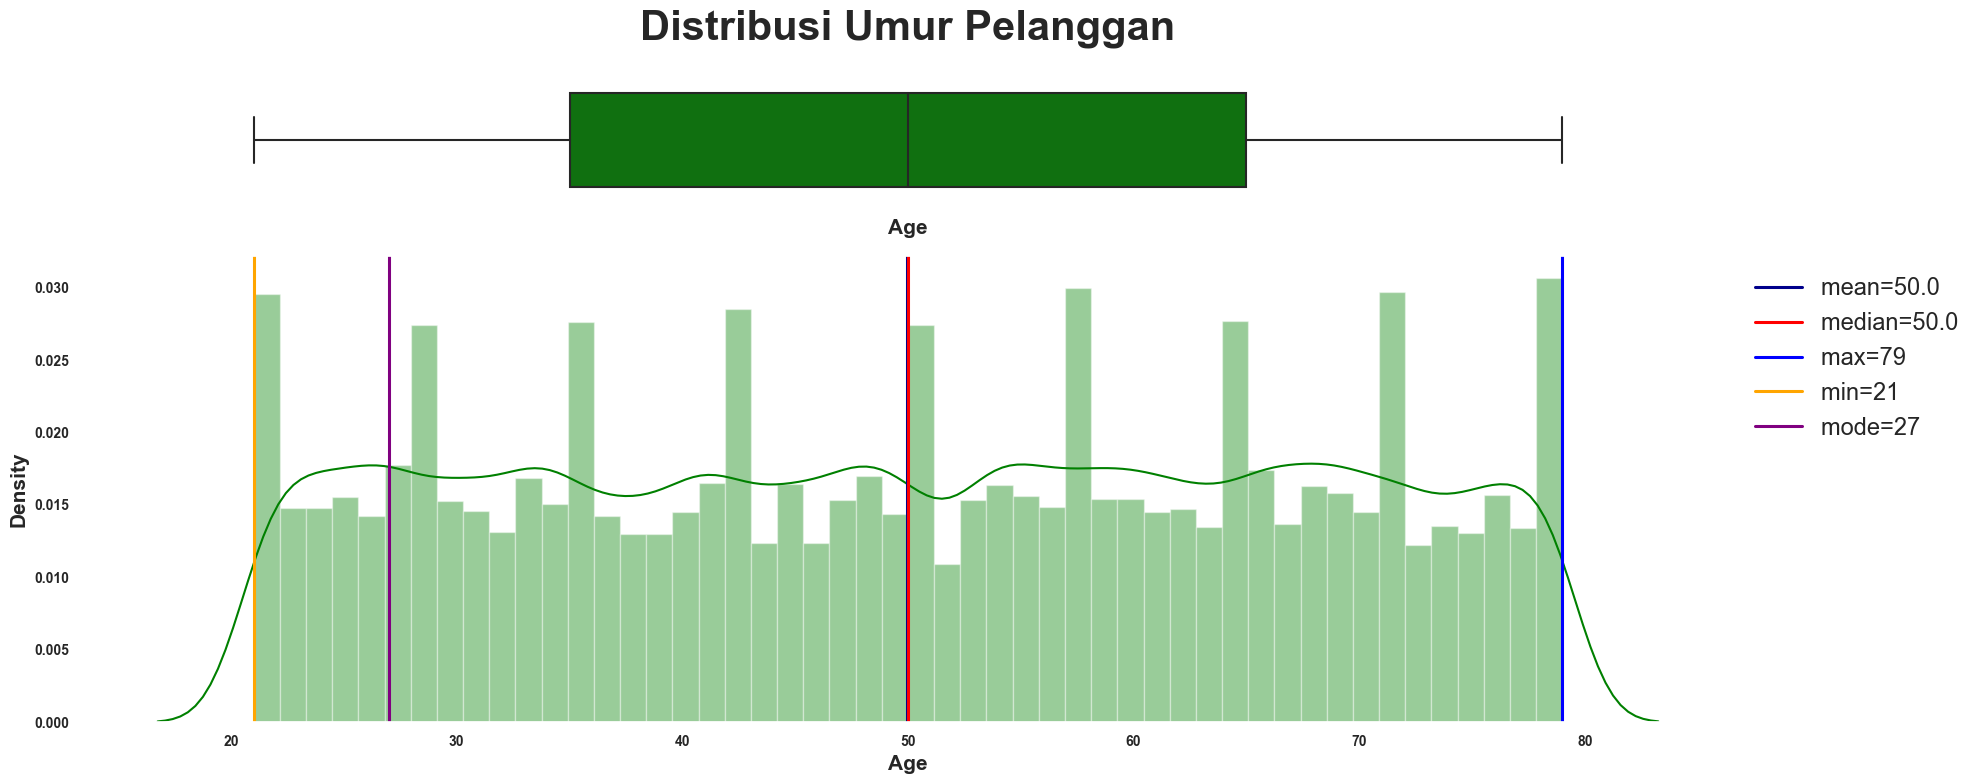

In [22]:
numerical_plot(
    data= df,
    col= "Age",
    title= "Distribusi Umur Pelanggan",
    simb= " ",
    ylabel= "Density",
    color= "green",
)

### Kolom Income

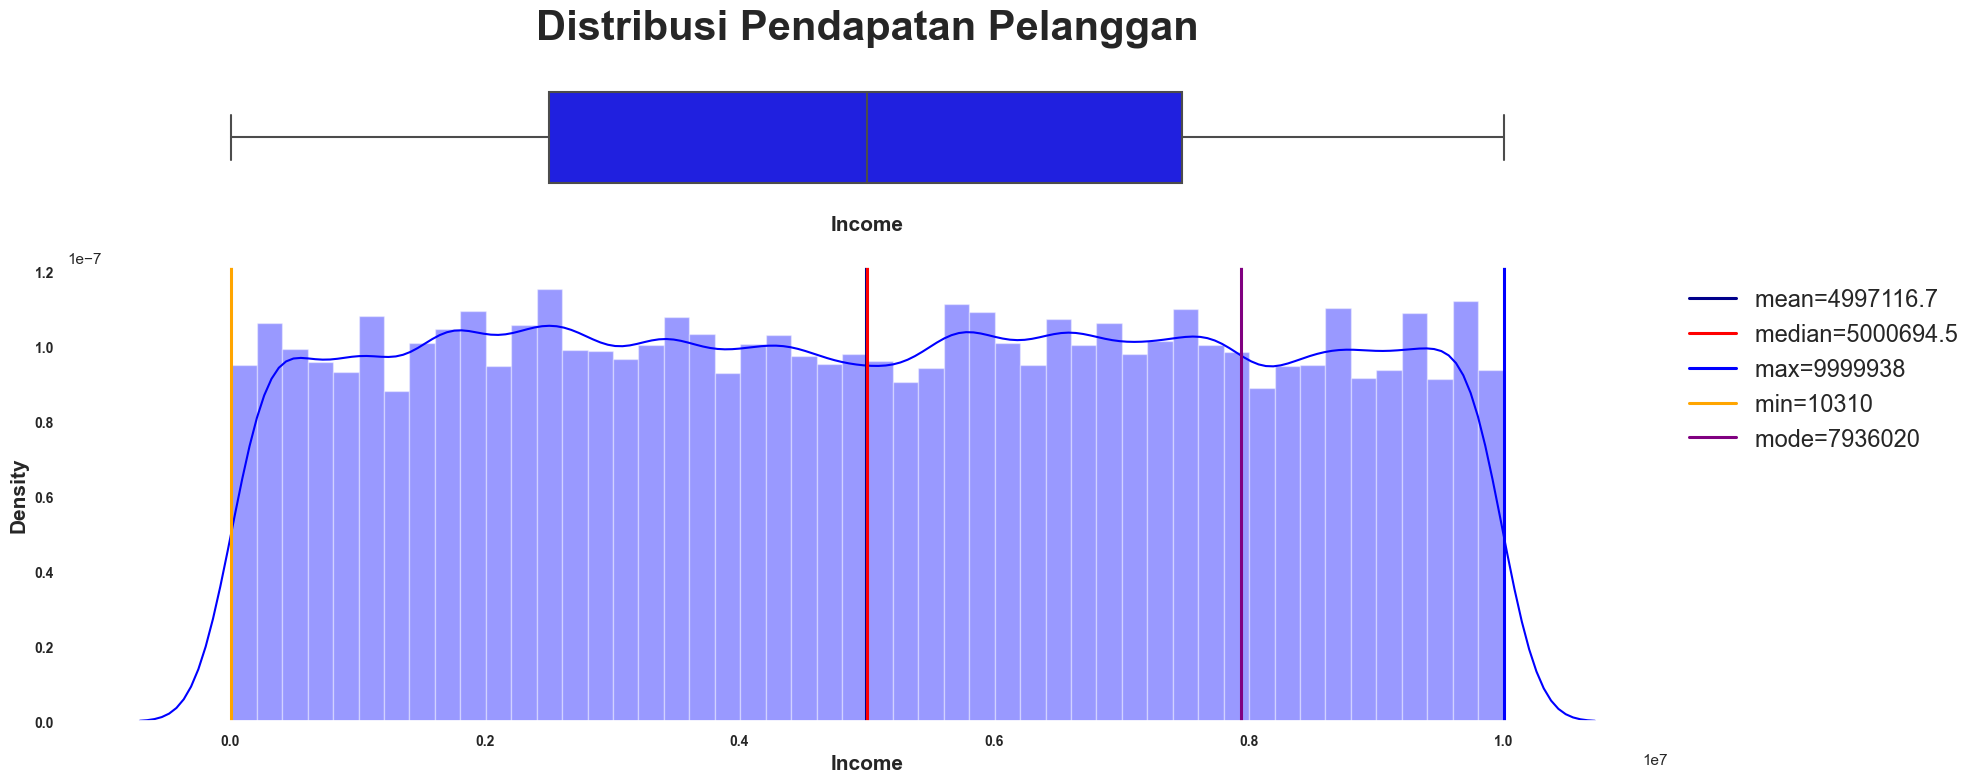

In [31]:
numerical_plot(
    data= df,
    col= "Income",
    title= "Distribusi Pendapatan Pelanggan",
    simb= " ",
    ylabel= "Density",
    color= "blue",
)

### Kolom Experience

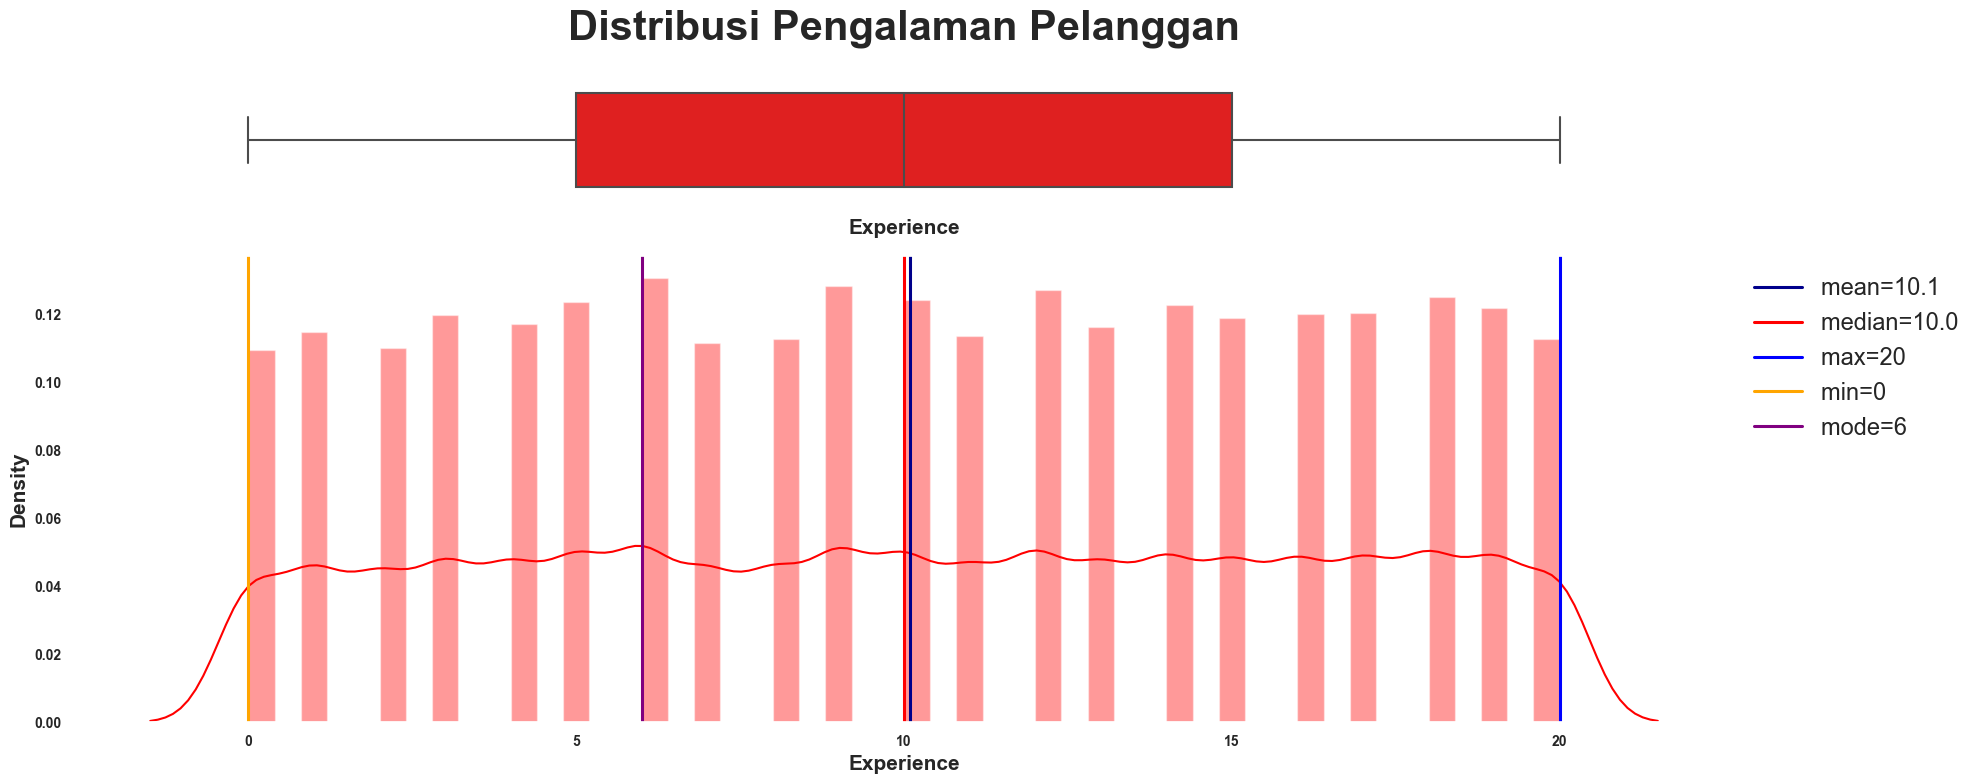

In [32]:
numerical_plot(
    data= df,
    col= "Experience",
    title= "Distribusi Pengalaman Pelanggan",
    simb= " ",
    ylabel= "Density",
    color= "red",
)

### Kolom Married/Single

In [32]:
df['Married/Single'].value_counts(normalize=True)

Married/Single
single     0.897905
married    0.102095
Name: proportion, dtype: float64

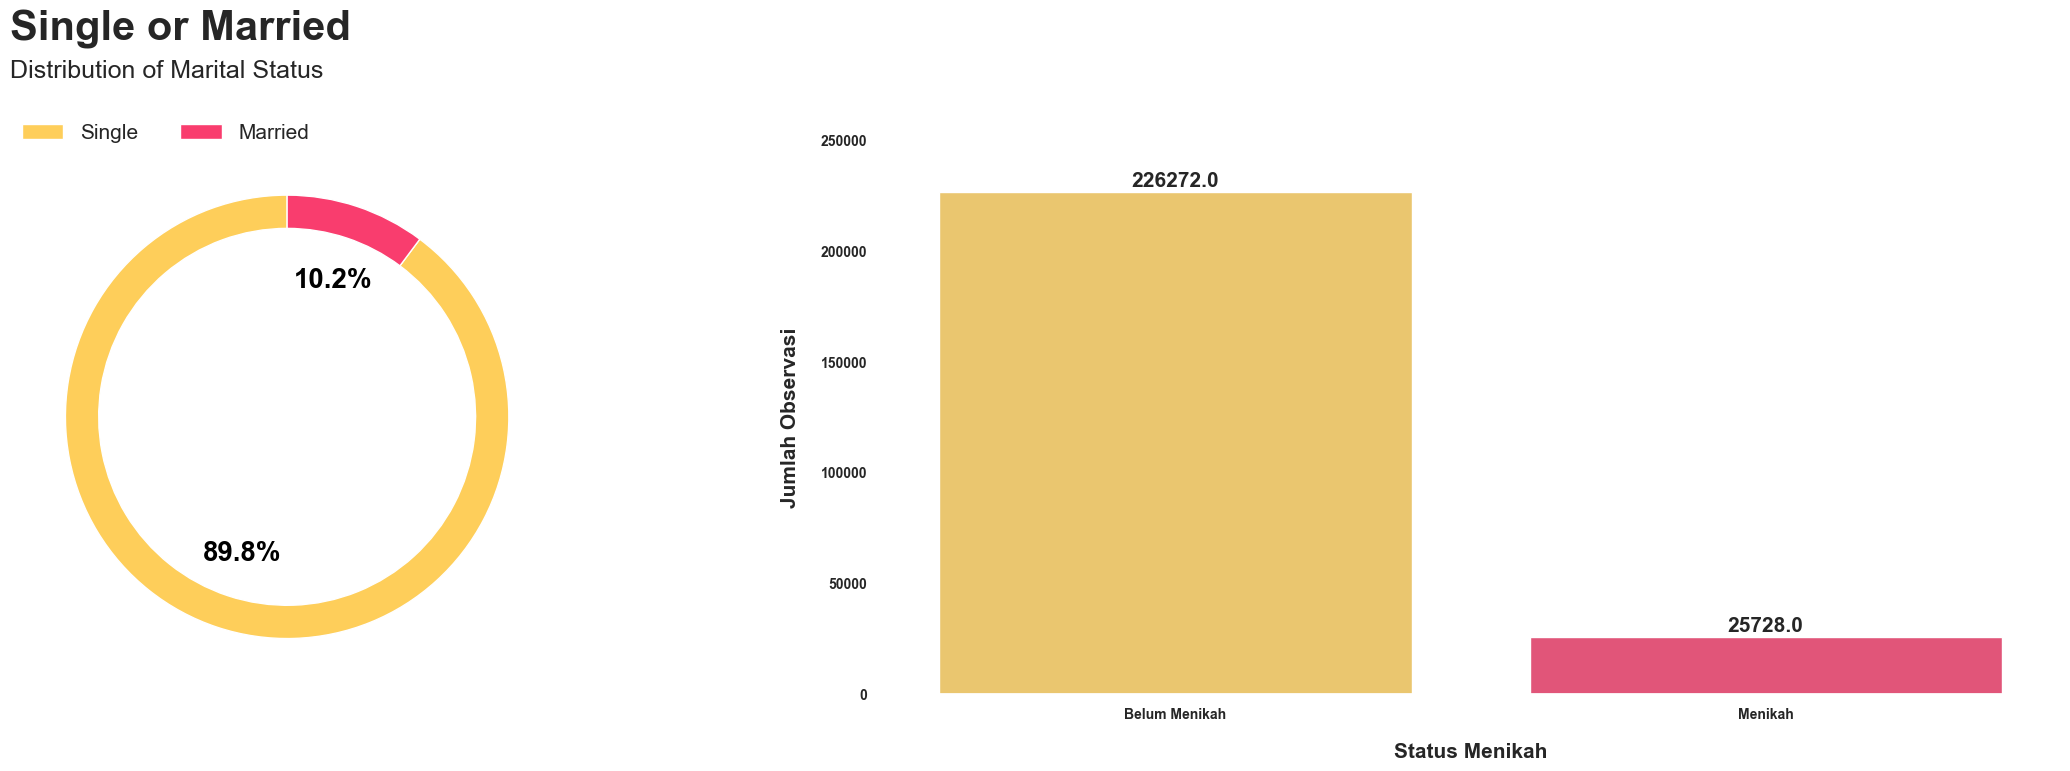

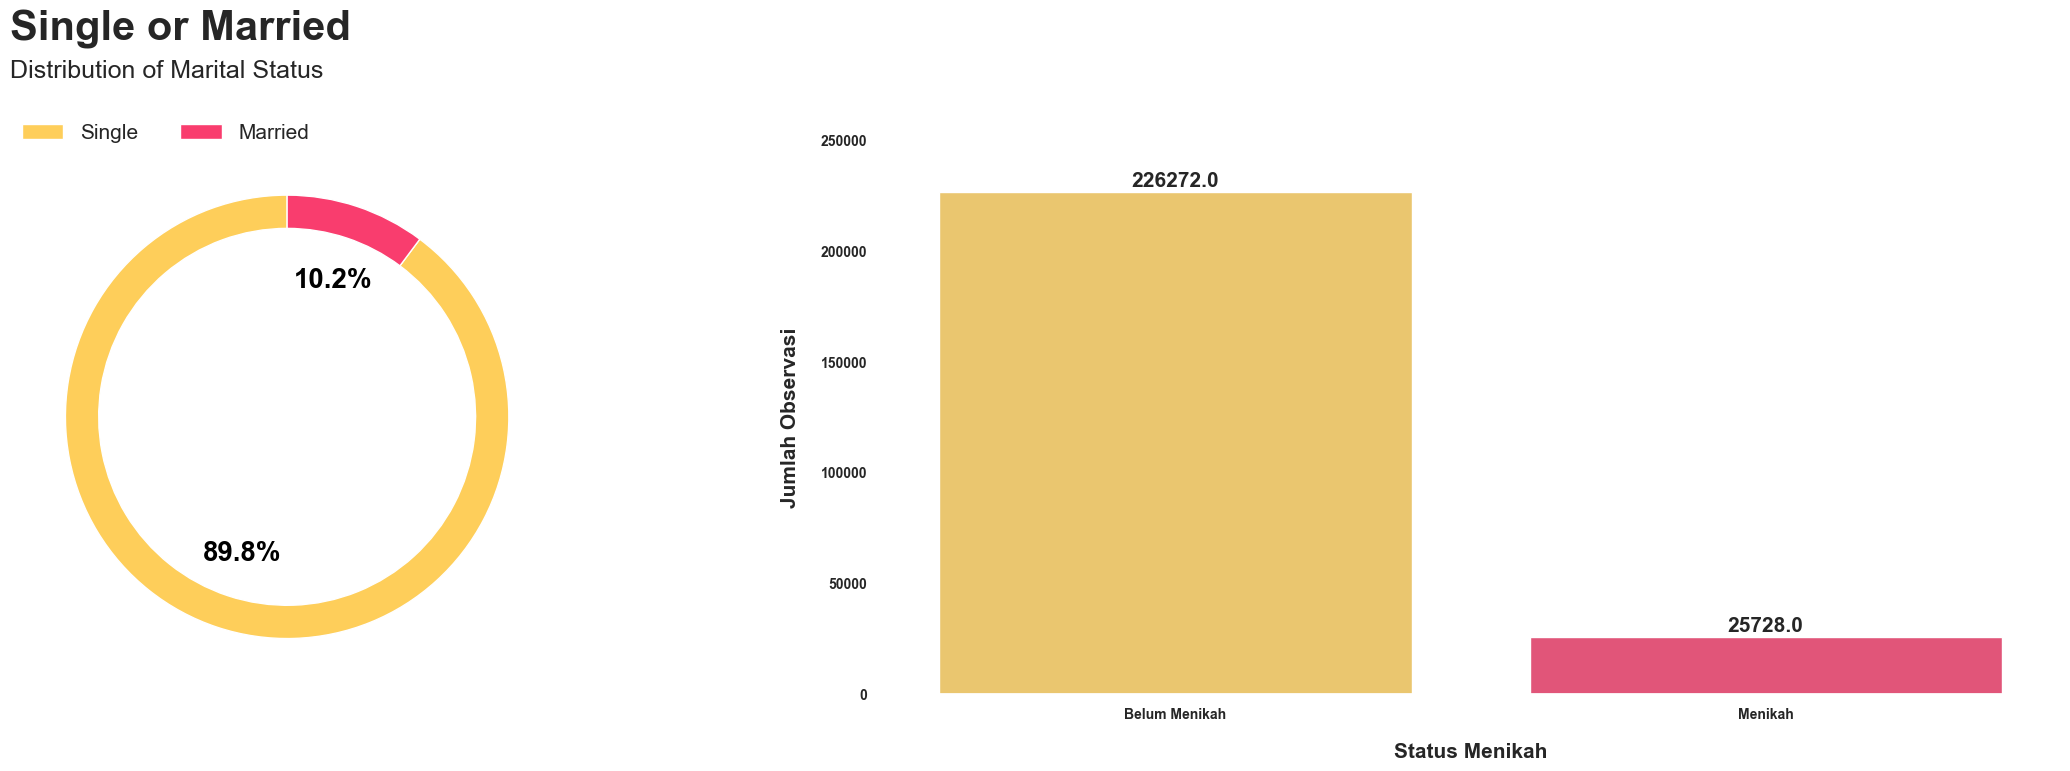

In [19]:
df_func = df["Married/Single"].value_counts()

count_pie_plot(
    datapie= df_func,
    datacount= df,
    colcount= "Married/Single",
    colpiey= df_func.values,
    text1= "Single or Married",
    pielabels= ["Single", "Married"],
    text2= "Distribution of Marital Status",
    piecomap= ["#fece5a", "#f93d6e"],
    countcomap= ["#fece5a", "#f93d6e"],
    xlabel= "Status Menikah",
    piefs= 20,
    yplus= 5000,
    ylabel= "Jumlah Observasi",
    xticklabel= ["Belum Menikah", "Menikah"],
    yticklabel= list(np.arange(0, 260000, 50000)),
    ystart= 0,
    yend= 250000,
)

### Kolom House Ownership

In [20]:
df['House_Ownership'].value_counts(normalize=True)

House_Ownership
rented          0.920230
owned           0.051262
norent_noown    0.028508
Name: proportion, dtype: float64

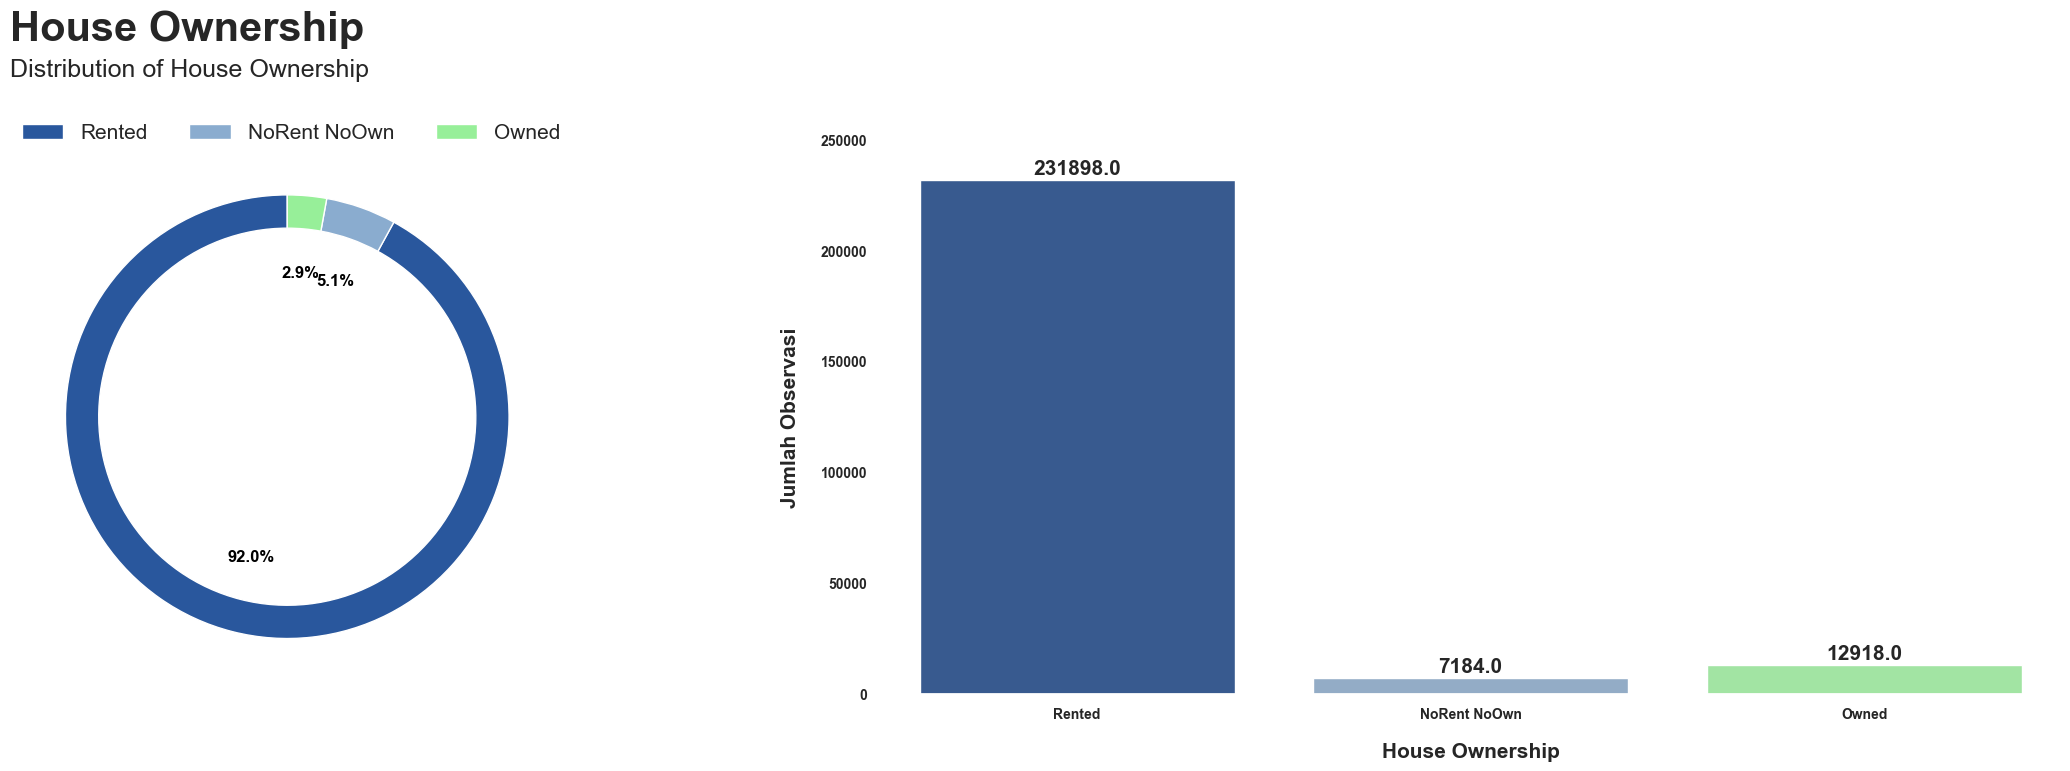

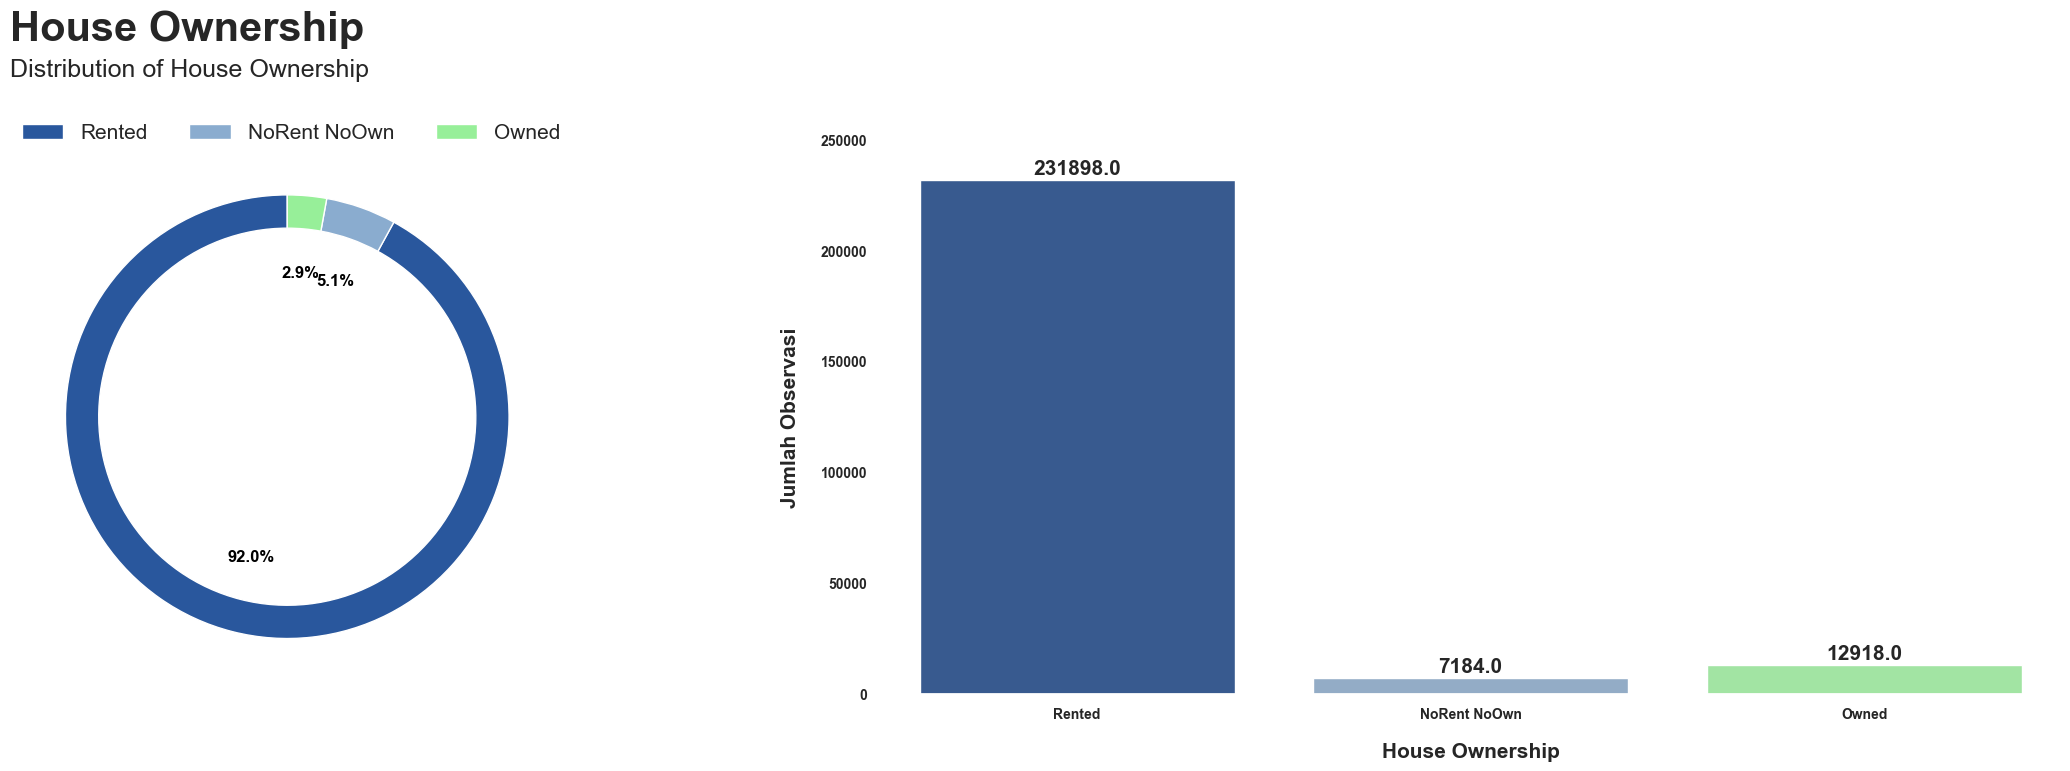

In [21]:
df_func = df["House_Ownership"].value_counts()

count_pie_plot(
    datapie= df_func,
    datacount= df,
    colcount= "House_Ownership",
    colpiey= df_func.values,
    text1= "House Ownership",
    pielabels= ["Rented", "NoRent NoOwn", "Owned"],
    text2= "Distribution of House Ownership",
    piecomap= ["#29579d", "#8aaccf", "#97ef99"],
    countcomap= ["#29579d", "#8aaccf", "#97ef99"],
    xlabel= "House Ownership",
    piefs= 12,
    yplus= 5000,
    ylabel= "Jumlah Observasi",
    xticklabel= ["Rented", "NoRent NoOwn", "Owned"],
    yticklabel= list(np.arange(0, 260000, 50000)),
    ystart= 0,
    yend= 250000,
)

### Kolom Car Ownership

In [97]:
df['Car_Ownership'].value_counts(normalize=True)

Car_Ownership
no     0.698413
yes    0.301587
Name: proportion, dtype: float64

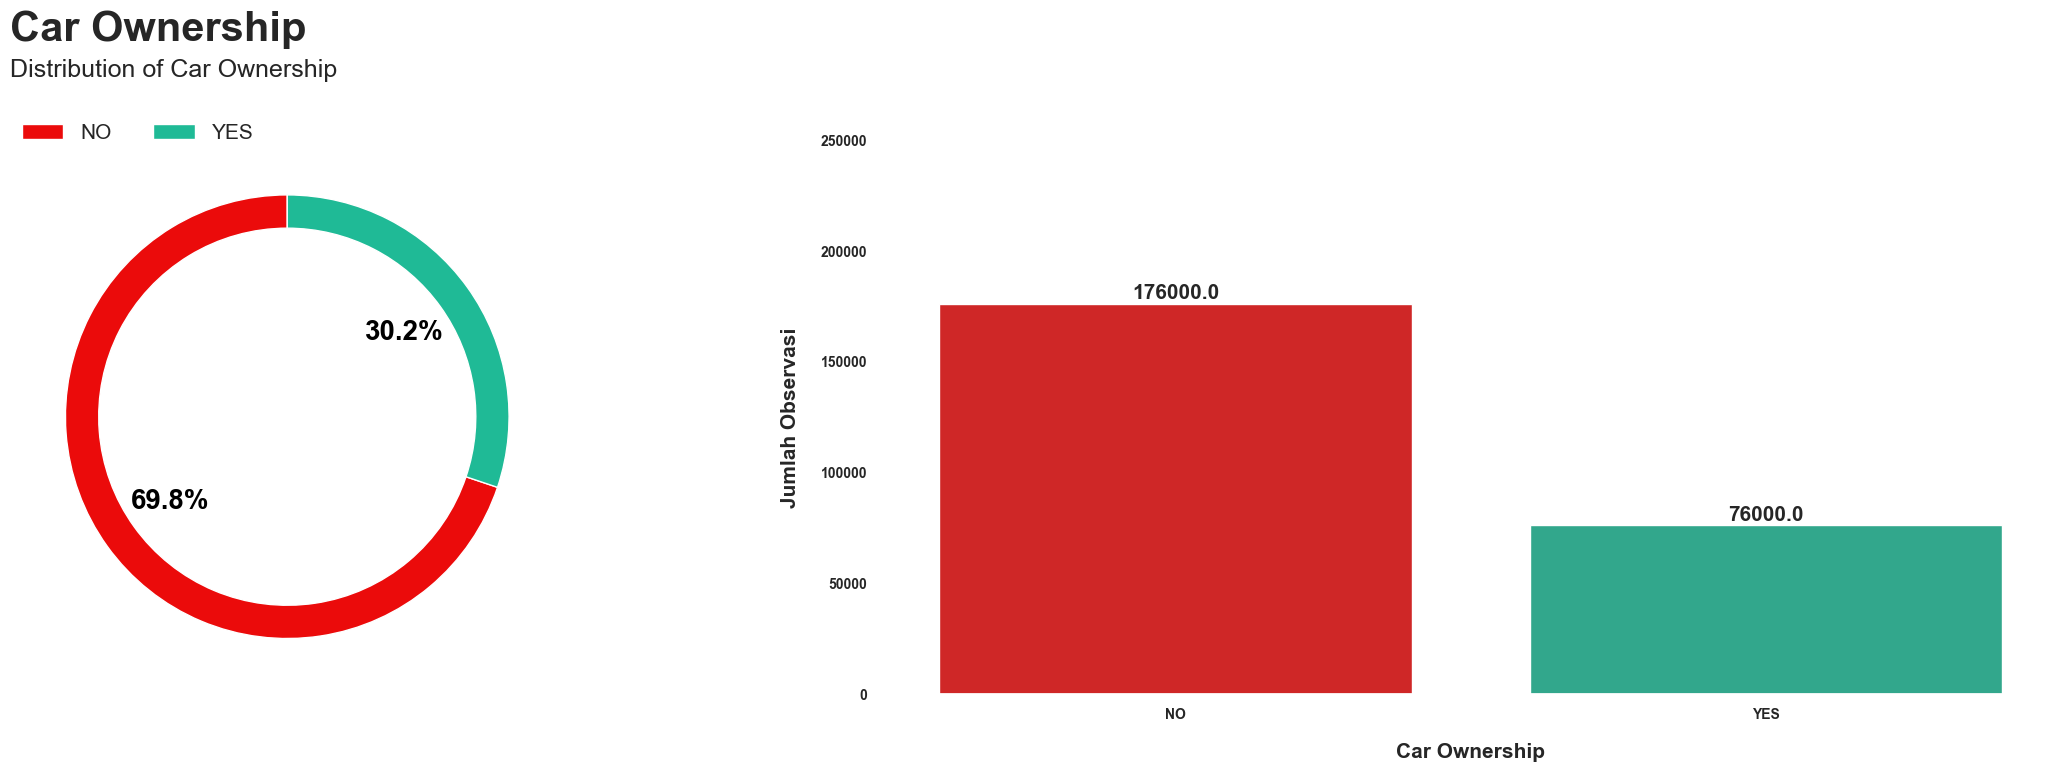

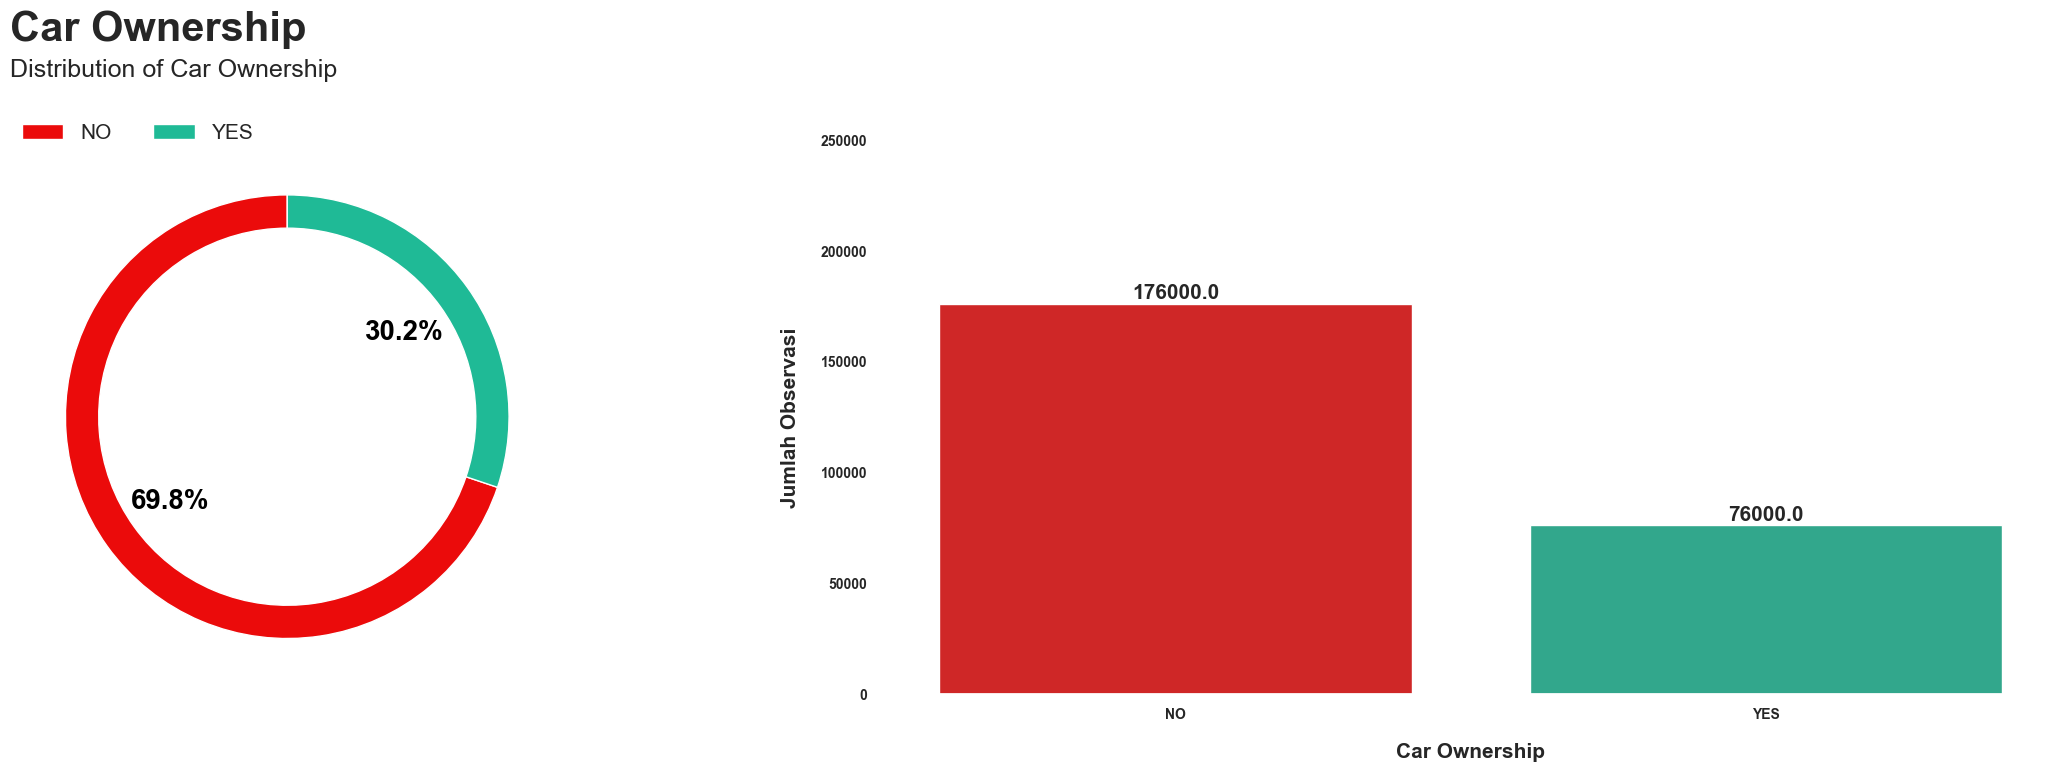

In [100]:
df_func = df["Car_Ownership"].value_counts()

count_pie_plot(
    datapie= df_func,
    datacount= df,
    colcount= "Car_Ownership",
    colpiey= df_func.values,
    text1= "Car Ownership",
    pielabels= ["NO", "YES"],
    text2= "Distribution of Car Ownership",
    piecomap= ["#eb0b0b", "#1fba96"],
    countcomap= ["#eb0b0b", "#1fba96"],
    xlabel= "Car Ownership",
    piefs= 20,
    yplus= 5000,
    ylabel= "Jumlah Observasi",
    xticklabel= ["NO", "YES"],
    yticklabel= list(np.arange(0, 260000, 50000)),
    ystart= 0,
    yend= 250000,
)

### Kolom City

In [41]:
df['CITY'].value_counts().sort_values(ascending=False).head()

CITY
Aurangabad       1543
Vijayanagaram    1259
Bhopal           1208
Bulandshahr      1185
Saharsa          1180
Name: count, dtype: int64

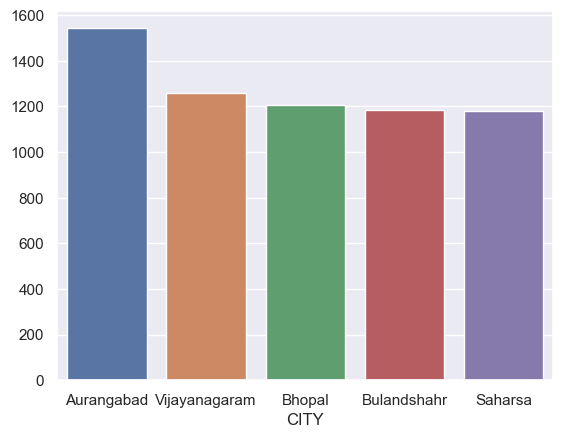

In [42]:
top_cities = df['CITY'].value_counts().sort_values(ascending=False).head()

sns.barplot(x=top_cities.index, y=top_cities.values)
plt.show()

### Kolom State

In [46]:
df['STATE'].value_counts().sort_values(ascending=False).head()

STATE
Uttar_Pradesh     28400
Maharashtra       25562
Andhra_Pradesh    25297
West_Bengal       23483
Bihar             19780
Name: count, dtype: int64

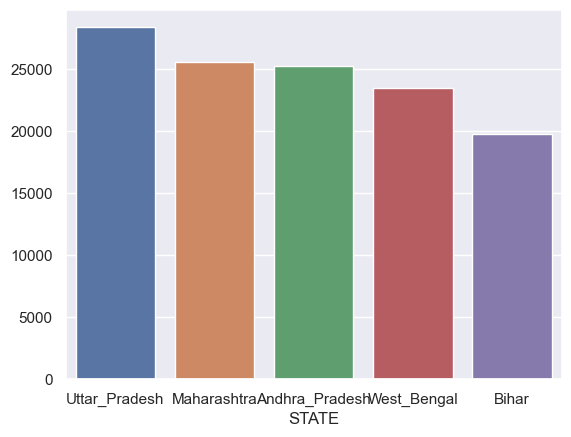

In [47]:
top_states = df['STATE'].value_counts().sort_values(ascending=False).head()

sns.barplot(x=top_states.index, y=top_states.values)
plt.show()

### Kolom Current Job Years

In [48]:
df['CURRENT_JOB_YRS'].value_counts().sort_values(ascending=False).head()

CURRENT_JOB_YRS
3    29460
4    28339
5    25091
6    23491
7    19925
Name: count, dtype: int64

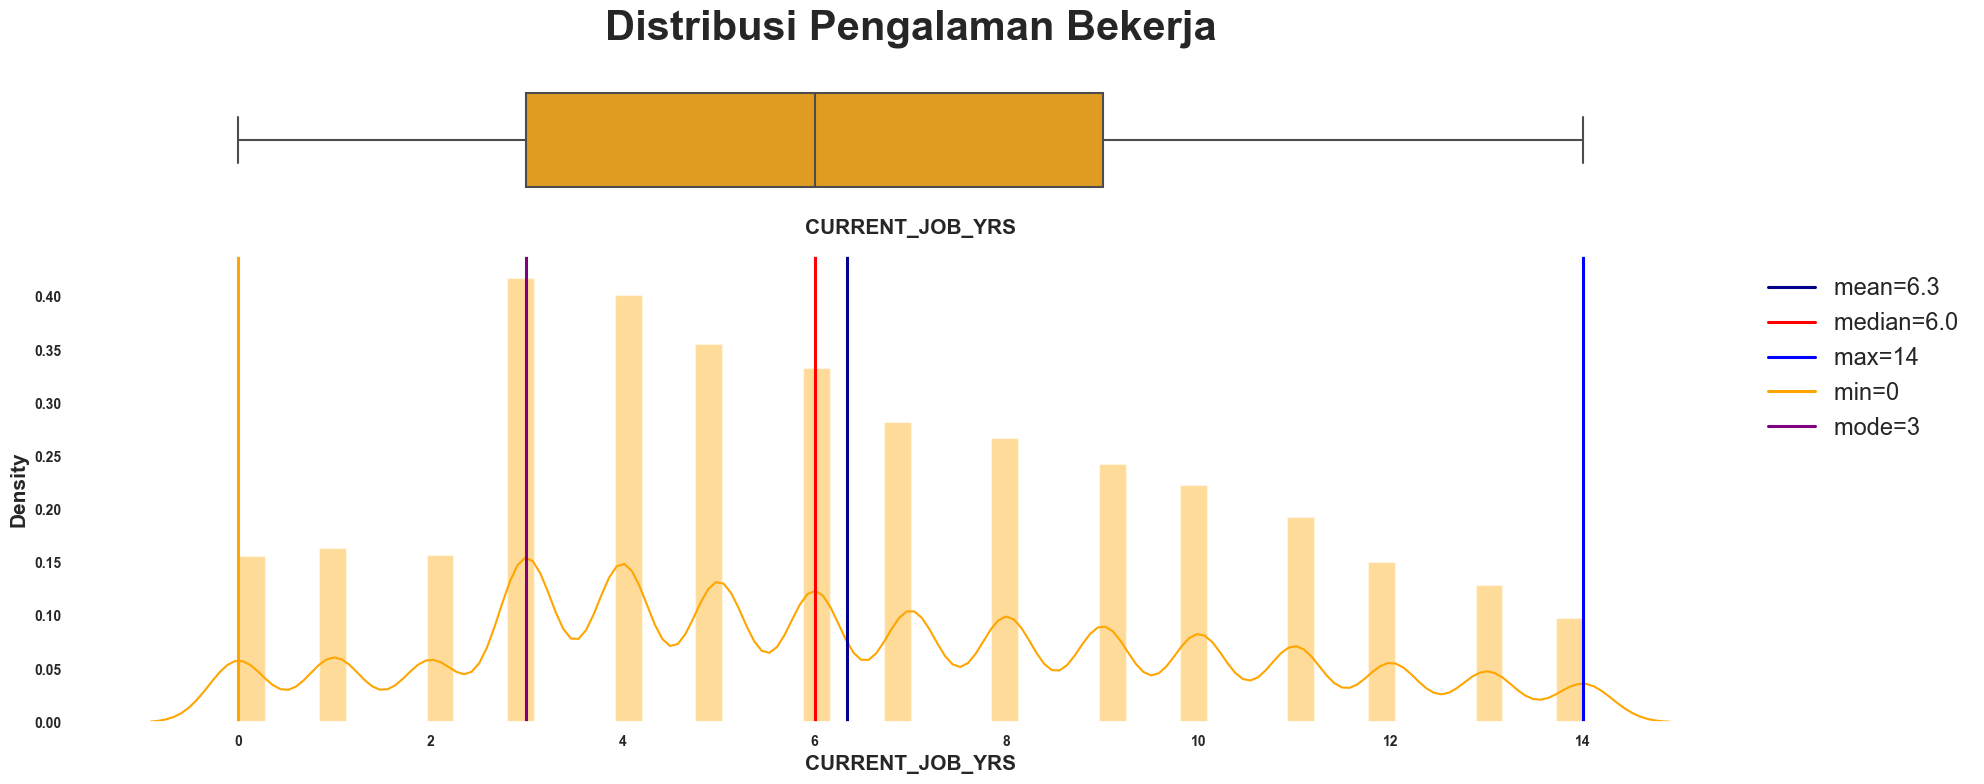

In [23]:
numerical_plot(
    data= df,
    col= "CURRENT_JOB_YRS",
    title= "Distribusi Pengalaman Bekerja",
    simb= " ",
    ylabel= "Density",
    color= "orange",
)

### Kolom Current House Years

In [52]:
df['CURRENT_HOUSE_YRS'].value_counts().sort_values(ascending=False)

CURRENT_HOUSE_YRS
11    51873
12    51791
13    50659
14    49003
10    48674
Name: count, dtype: int64

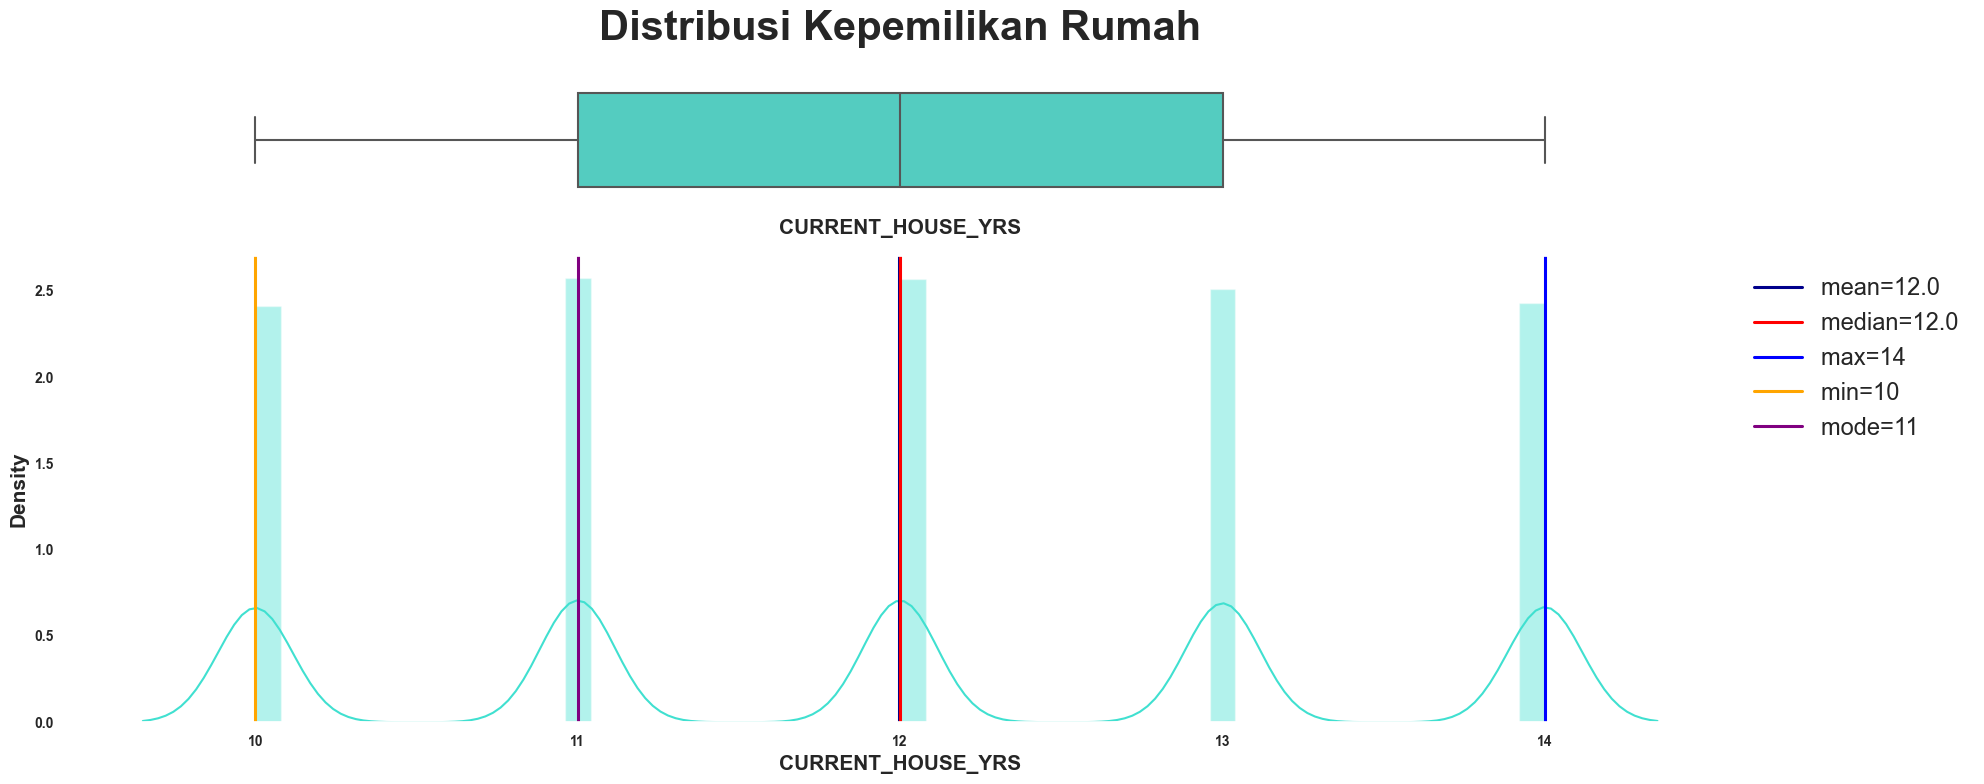

In [30]:
numerical_plot(
    data= df,
    col= "CURRENT_HOUSE_YRS",
    title= "Distribusi Kepemilikan Rumah",
    simb= " ",
    ylabel= "Density",
    color= "turquoise",
)

### Kolom Risk Flag

In [68]:
df['Risk_Flag'].value_counts(normalize=True)

Risk_Flag
0    0.877
1    0.123
Name: proportion, dtype: float64

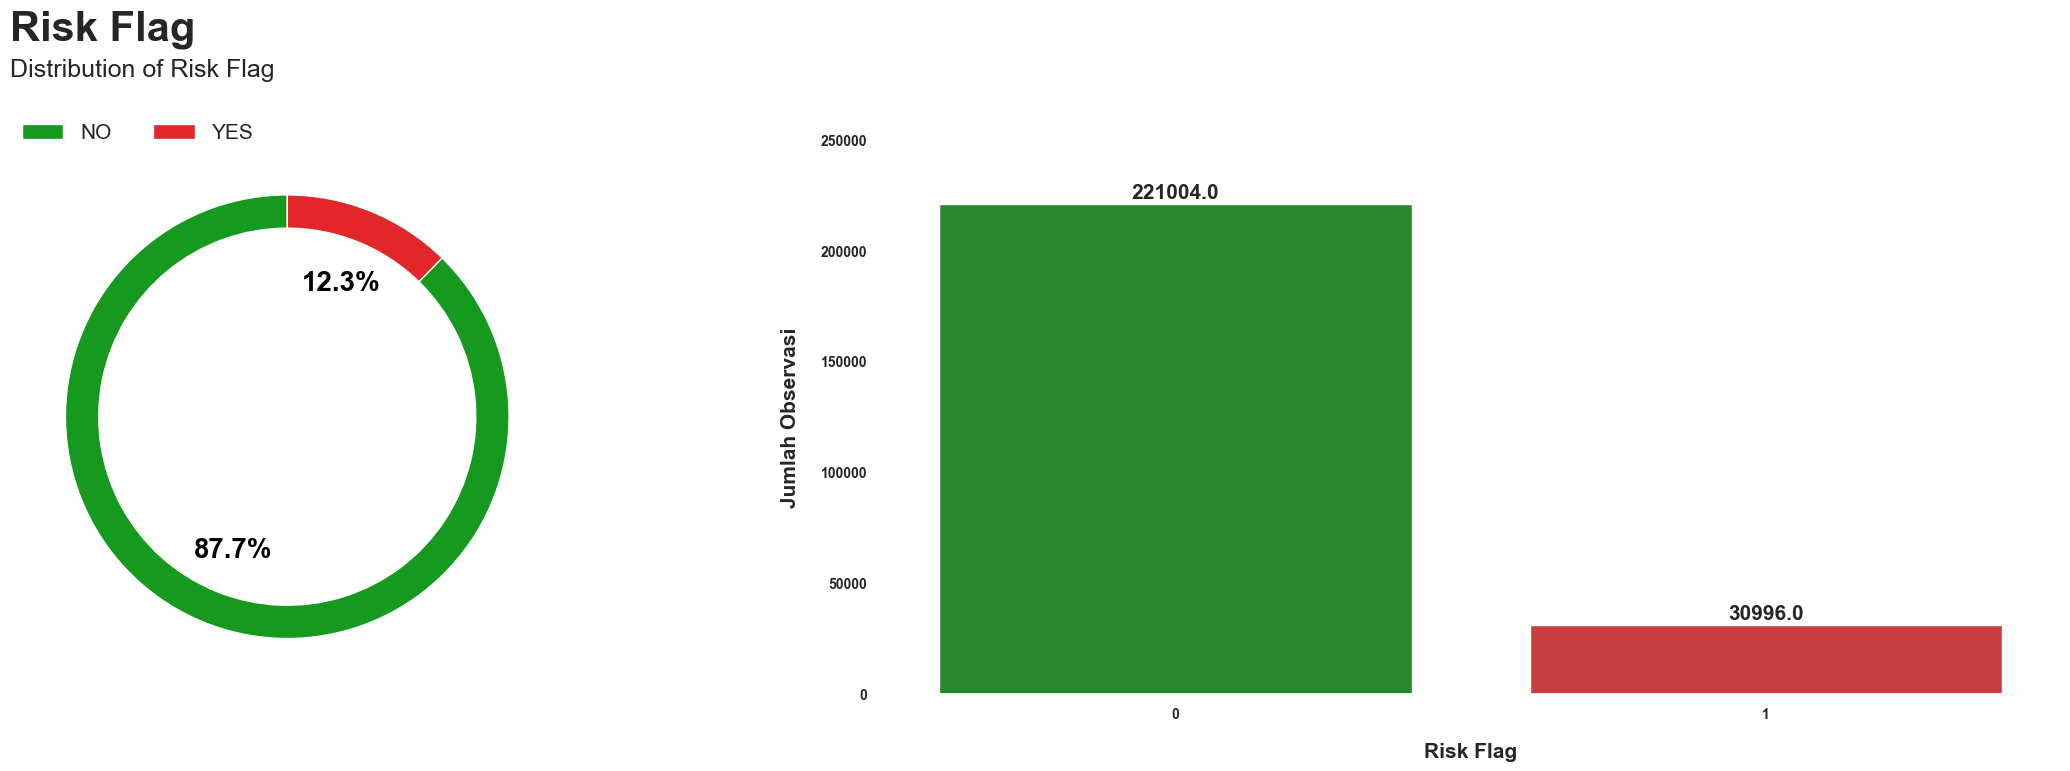

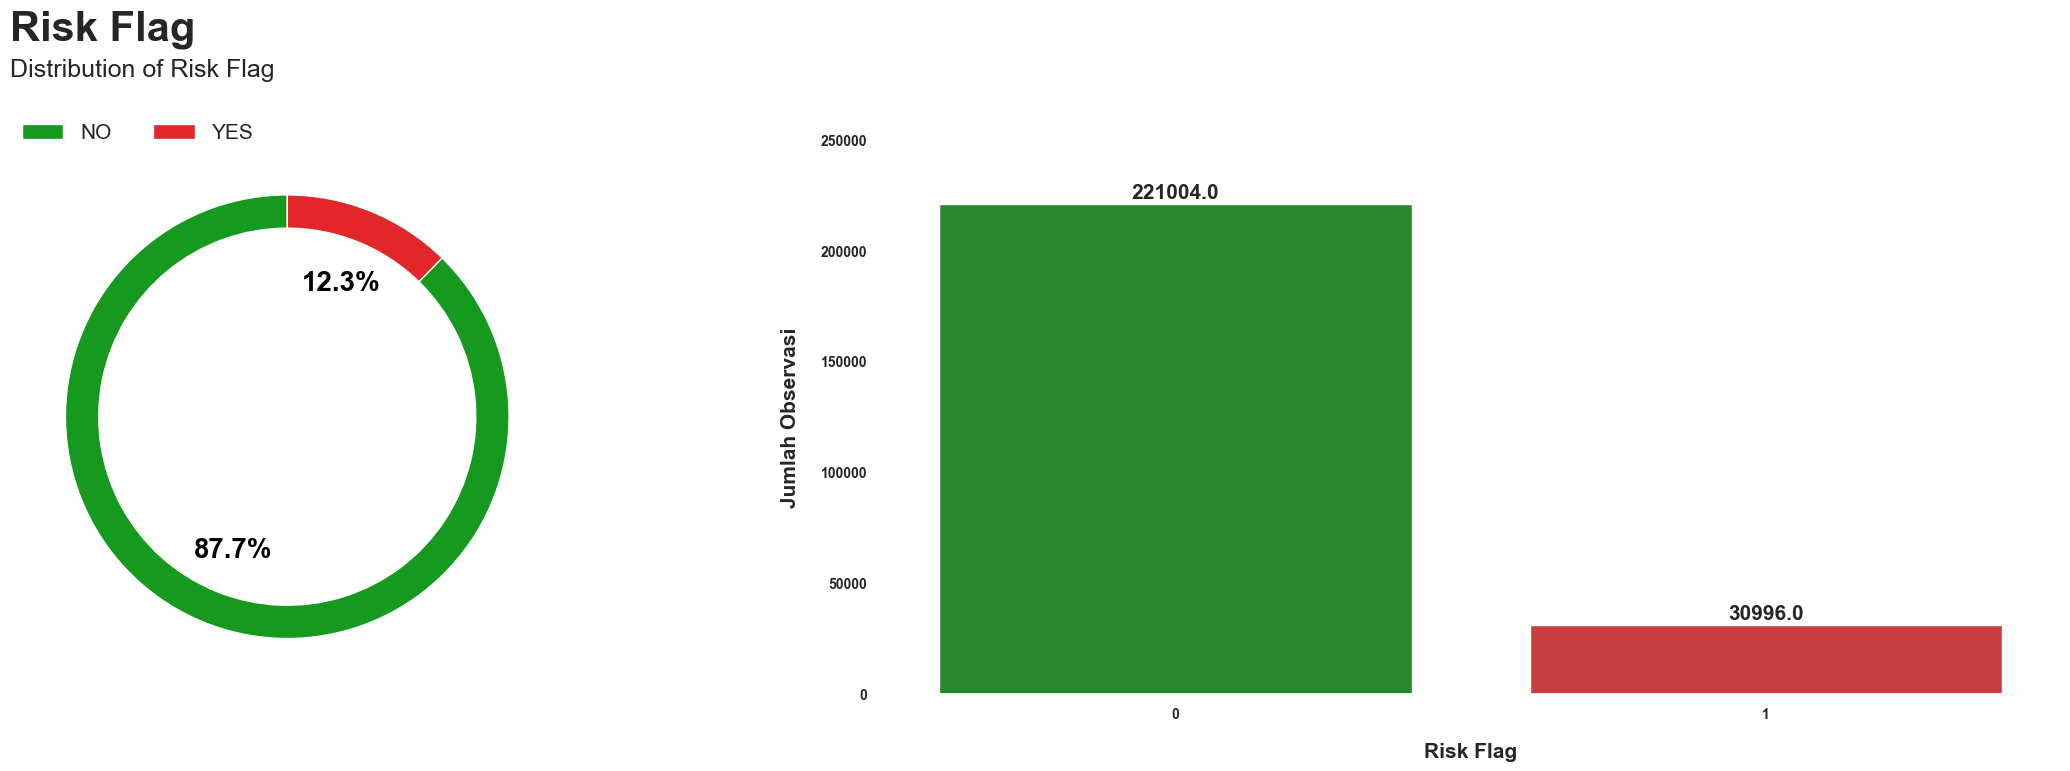

In [54]:
df_func = df["Risk_Flag"].value_counts()

count_pie_plot(
    datapie= df_func,
    datacount= df,
    colcount= "Risk_Flag",
    colpiey= df_func.values,
    text1= "Risk Flag",
    pielabels= ["NO", "YES"],
    text2= "Distribution of Risk Flag",
    piecomap= ["#15991e", "#e12729"],
    countcomap= ["#15991e", "#e12729"],
    xlabel= "Risk Flag",
    piefs= 20,
    yplus= 5000,
    ylabel= "Jumlah Observasi",
    xticklabel= ["0", "1"],
    yticklabel= list(np.arange(0, 260000, 50000)),
    ystart= 0,
    yend= 250000,
)

### <font color = 'darkgreen'> 2. Bivariate Analysis </font>

### Numeric Columns

In [62]:
numeric_cols.corr()

Id    Income       Age  Experience   
Id                          1.000000 -0.001324 -0.001816   -0.005810  \
Income                     -0.001324  1.000000 -0.000652    0.006422   
Age                        -0.001816 -0.000652  1.000000   -0.001118   
Experience                 -0.005810  0.006422 -0.001118    1.000000   
CURRENT_JOB_YRS            -0.003250  0.007045  0.002154    0.646098   
CURRENT_HOUSE_YRS           0.001972 -0.002397 -0.020134    0.019309   
Risk_Flag                   0.032153 -0.003091 -0.021809   -0.034523   
Married_Single_Encode       0.001134  0.002682 -0.005323   -0.001752   
Car_Ownership_Encode       -0.004313  0.004068  0.009395    0.007519   
House_Ownership_Encode     -0.002583  0.016433 -0.009820   -0.007912   
Profession_Encode          -0.005734  0.000725 -0.008551    0.000975   
CITY_Encode                -0.000972 -0.001919  0.002104   -0.025703   
STATE_Encode                0.002012 -0.004067 -0.004985   -0.001251   
Age_Group_Encode           -0.001807  0.001726  0.968463    0.001440   
Income_Category_Enocode     0.002049  0.384939  0.015121    0.010956   
Experience_Category_Encode -0.003012 -0.010286  0.001699    0.465491   
profession_map_encode       0.000927 -0.009928 -0.002052    0.011529   
Zone_Encode                -0.000193  0.001970  0.003977   -0.015412   

                            CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag   
Id                                -0.003250           0.001972   0.032153  \
Income                             0.007045          -0.002397  -0.003091   
Age                                0.002154          -0.020134  -0.021809   
Experience                         0.646098           0.019309  -0.034523   
CURRENT_JOB_YRS                    1.000000           0.005372  -0.016942   
CURRENT_HOUSE_YRS                  0.005372           1.000000  -0.004375   
Risk_Flag                         -0.016942          -0.004375   1.000000   
Married_Single_Encode              0.004251          -0.007539   0.021092   
Car_Ownership_Encode               0.011099           0.000251  -0.024036   
House_Ownership_Encode            -0.009790          -0.005618   0.023622   
Profession_Encode                 -0.004536           0.001954  -0.004900   
CITY_Encode                       -0.027353          -0.010654   0.004575   
STATE_Encode                       0.008745           0.007281  -0.003401   
Age_Group_Encode                   0.004305          -0.015790  -0.020448   
Income_Category_Enocode            0.011632           0.006404   0.004925   
Experience_Category_Encode         0.370143           0.007729  -0.023445   
profession_map_encode              0.006874           0.019433   0.004930   
Zone_Encode                       -0.002680          -0.008859  -0.024348   

                            Married_Single_Encode  Car_Ownership_Encode   
Id                                       0.001134             -0.004313  \
Income                                   0.002682              0.004068   
Age                                     -0.005323              0.009395   
Experience                              -0.001752              0.007519   
CURRENT_JOB_YRS                          0.004251              0.011099   
CURRENT_HOUSE_YRS                       -0.007539              0.000251   
Risk_Flag                                0.021092             -0.024036   
Married_Single_Encode                    1.000000              0.001206   
Car_Ownership_Encode                     0.001206              1.000000   
House_Ownership_Encode                  -0.022501             -0.001233   
Profession_Encode                       -0.007534              0.011887   
CITY_Encode                              0.012280              0.001648   
STATE_Encode                            -0.009477              0.026000   
Age_Group_Encode                        -0.003982              0.006461   
Income_Category_Enocode                  0.003581              0.014261   
E

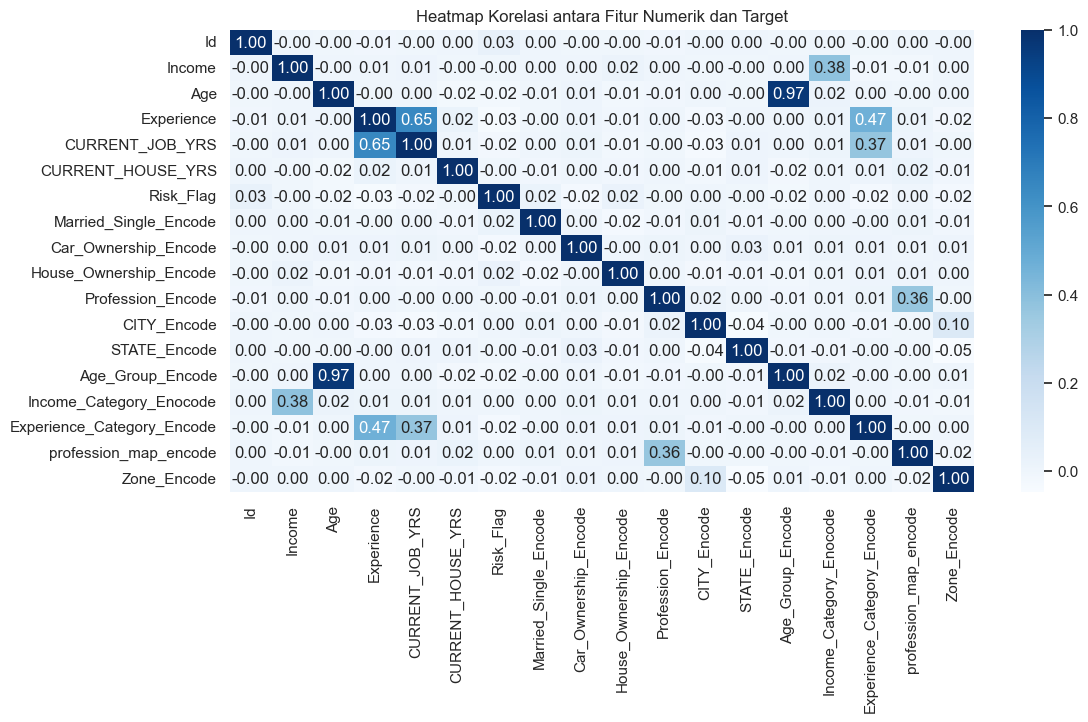

In [64]:
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Heatmap Korelasi antara Fitur Numerik dan Target', fontsize=12)
plt.show()

Dari hasil ini, tidak ada fitur numerik yang memiliki korelasi yang signifikan dengan target `Risk_Flag`.

### Categorical Columns

### Kolom 'Age_Group' VS 'Risk_Flag'

In [24]:
age_grouped = df.groupby(['Age_Group', 'Risk_Flag']).size().unstack()
age_grouped['pcg'] = (age_grouped[1] / age_grouped.sum(axis=1)) * 100
age_grouped = age_grouped.sort_values(by='pcg', ascending=False)
age_grouped

Risk_Flag      0     1        pcg
Age_Group                        
21-35      52663  8420  13.784523
51-65      56192  7592  11.902672
36-50      55489  7452  11.839659
66-79      56660  7532  11.733549

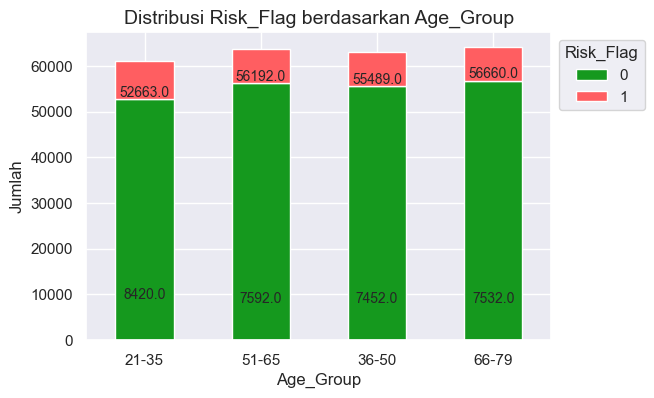

In [173]:
colors = ['#15991e', '#ff5e61']

ax = age_grouped.drop(columns='pcg').plot(kind='bar', stacked=True, figsize=(6, 4), color=colors)

plt.title('Distribusi Risk_Flag berdasarkan Age_Group', fontsize=14)
plt.xlabel('Age_Group', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=0)

for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width() / 2, height + 2, f'{height}', ha='center', va='bottom', fontsize=10)

# Menampilkan plot
plt.legend(title='Risk_Flag', bbox_to_anchor=(1, 1))
plt.show()

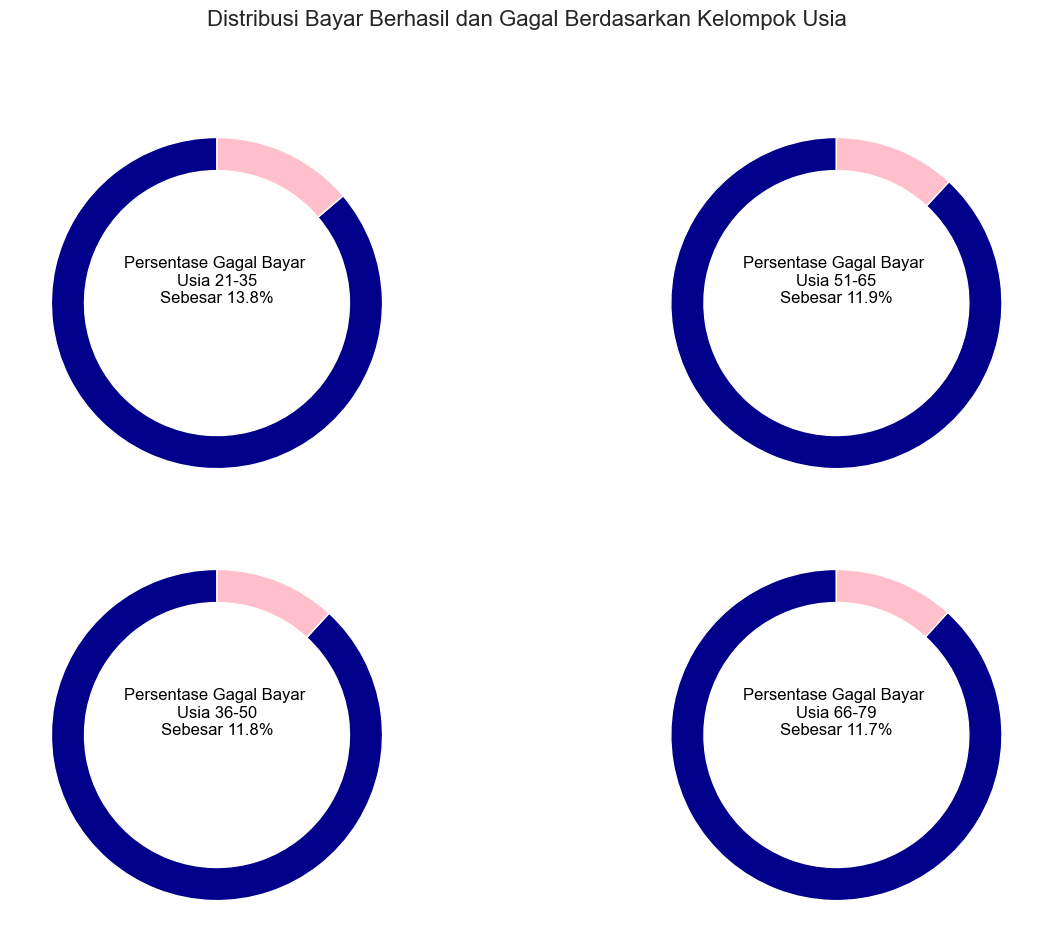

In [28]:
age_grouped = {
    '21-35': {'Berhasil Bayar': 52663, 'Gagal Bayar': 8420, 'pcg': 13.784523},
    '51-65': {'Berhasil Bayar': 56192, 'Gagal Bayar': 7592, 'pcg': 11.902672},
    '36-50': {'Berhasil Bayar': 55489, 'Gagal Bayar': 7452, 'pcg': 11.839659},
    '66-79': {'Berhasil Bayar': 56660, 'Gagal Bayar': 7532, 'pcg': 11.733549}
}

# Membuat subplot dengan 2 baris dan 2 kolom
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Loop melalui setiap kelompok usia dan membuat donut chart
for i, (age, data) in enumerate(age_grouped.items()):
    # Data untuk pie chart
    data_values = [data['Berhasil Bayar'], data['Gagal Bayar']]
    labels = ['Berhasil Bayar', 'Gagal Bayar']
    pcg = data['pcg']
    
    # Menghitung indeks baris dan kolom
    row = i // 2
    col = i % 2

    # Membuat donut chart
    wedges, _ = axes[row, col].pie(data_values, startangle=90, wedgeprops=dict(width=0.2), colors=['darkblue', 'pink'])

    # Menambahkan lingkaran dalam berwarna putih untuk membuat donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    axes[row, col].add_artist(centre_circle)

    # Menambahkan informasi di tengah donut
    axes[row, col].text(0, 0, f'Persentase Gagal Bayar \nUsia {age}\nSebesar {pcg:.1f}%', fontsize=12, color='black', ha='center')

# Menampilkan plot
plt.suptitle('Distribusi Bayar Berhasil dan Gagal Berdasarkan Kelompok Usia', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Kolom 'Experience_Category' VS 'Risk_Flag'

In [69]:
exp_grouped = df.groupby(['Experience_Category', 'Risk_Flag']).size().unstack()
exp_grouped['pcg'] = (exp_grouped[1] / exp_grouped.sum(axis=1)) * 100
exp_grouped = exp_grouped.sort_values(by='pcg', ascending=False)
exp_grouped

Risk_Flag                 0      1        pcg
Experience_Category                          
0-3                   28431   5274  15.647530
3-6                   31717   4600  12.666244
6-10                  42923   5753  11.818966
10-20                107867  14085  11.549626

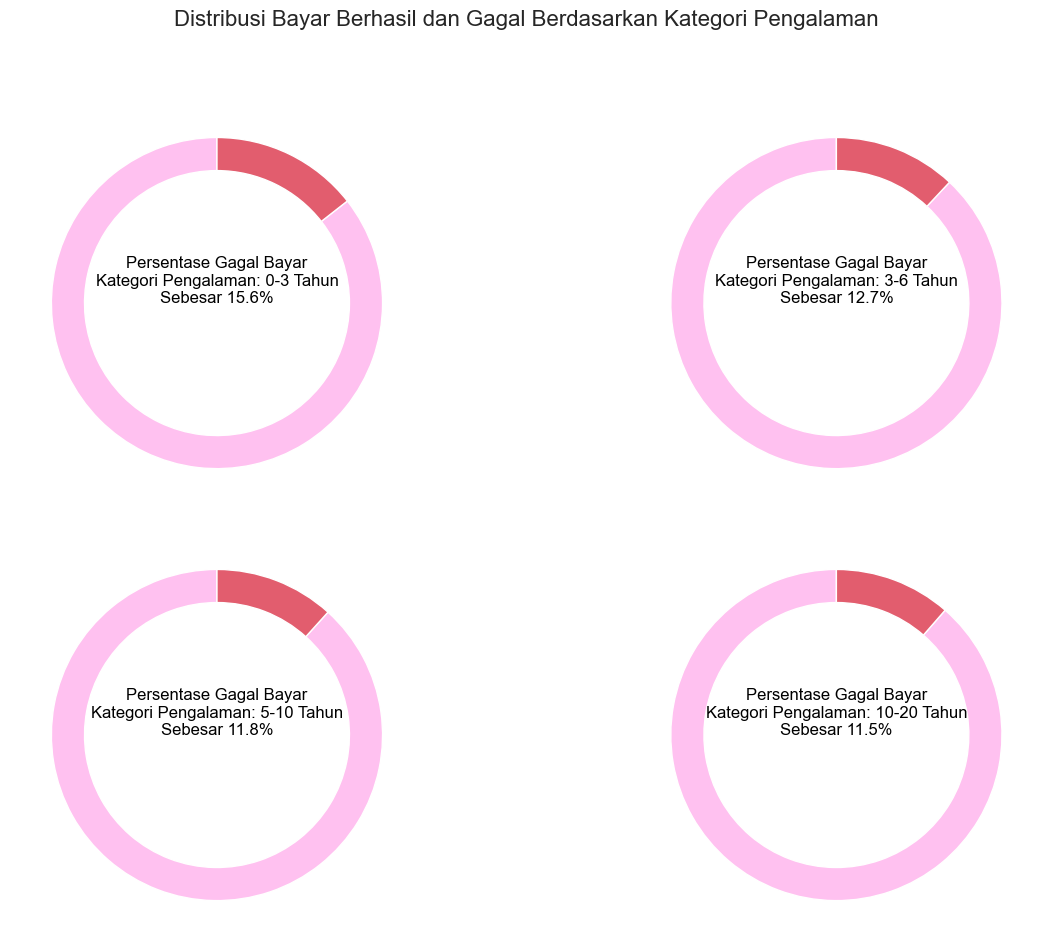

In [74]:

# Data yang diberikan
exp_grouped = {
    '0-3 Tahun': {'Berhasil Bayar': 49272, 'Gagal Bayar': 8309, 'pcg': 15.647530},
    '3-6 Tahun': {'Berhasil Bayar': 53799, 'Gagal Bayar': 7318, 'pcg': 12.666244},
    '5-10 Tahun': {'Berhasil Bayar': 53971, 'Gagal Bayar': 7147, 'pcg': 11.818966},
    '10-20 Tahun': {'Berhasil Bayar': 53896, 'Gagal Bayar': 6938, 'pcg': 11.549626}
}

# Membuat subplot dengan 2 baris dan 2 kolom
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Loop melalui setiap kelompok pengalaman dan membuat donut chart
for i, (exp, data) in enumerate(exp_grouped.items()):
    # Data untuk pie chart
    data_values = [data['Berhasil Bayar'], data['Gagal Bayar']]
    labels = ['Berhasil Bayar', 'Gagal Bayar']
    pcg = data['pcg']
    
    # Menghitung indeks baris dan kolom
    row = i // 2
    col = i % 2

    # Membuat donut chart
    wedges, _ = axes[row, col].pie(data_values, startangle=90, wedgeprops=dict(width=0.2), colors=['#ffc1f0', '#e25d6e'])

    # Menambahkan lingkaran dalam berwarna putih untuk membuat donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    axes[row, col].add_artist(centre_circle)

    # Menambahkan informasi di tengah donut
    axes[row, col].text(0, 0, f'Persentase Gagal Bayar\nKategori Pengalaman: {exp}\nSebesar {pcg:.1f}%', fontsize=12, color='black', ha='center')

# Menampilkan plot
plt.suptitle('Distribusi Bayar Berhasil dan Gagal Berdasarkan Kategori Pengalaman', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Kolom 'Income_Category' VS 'Risk_Flag'

In [57]:
inc_grouped = df.groupby(['Income_Category', 'Risk_Flag']).size().unstack()
inc_grouped['pcg'] = (inc_grouped[1] / inc_grouped.sum(axis=1)) * 100
inc_grouped.sort_values(by='pcg', ascending=False)

Risk_Flag             0     1        pcg
Income_Category                         
Very Low Income   43676  6623  13.167260
Very High Income  43034  6275  12.725872
Moderate Income   43897  6186  12.351497
High Income       45207  6028  11.765395
Low Income        45153  5884  11.528891

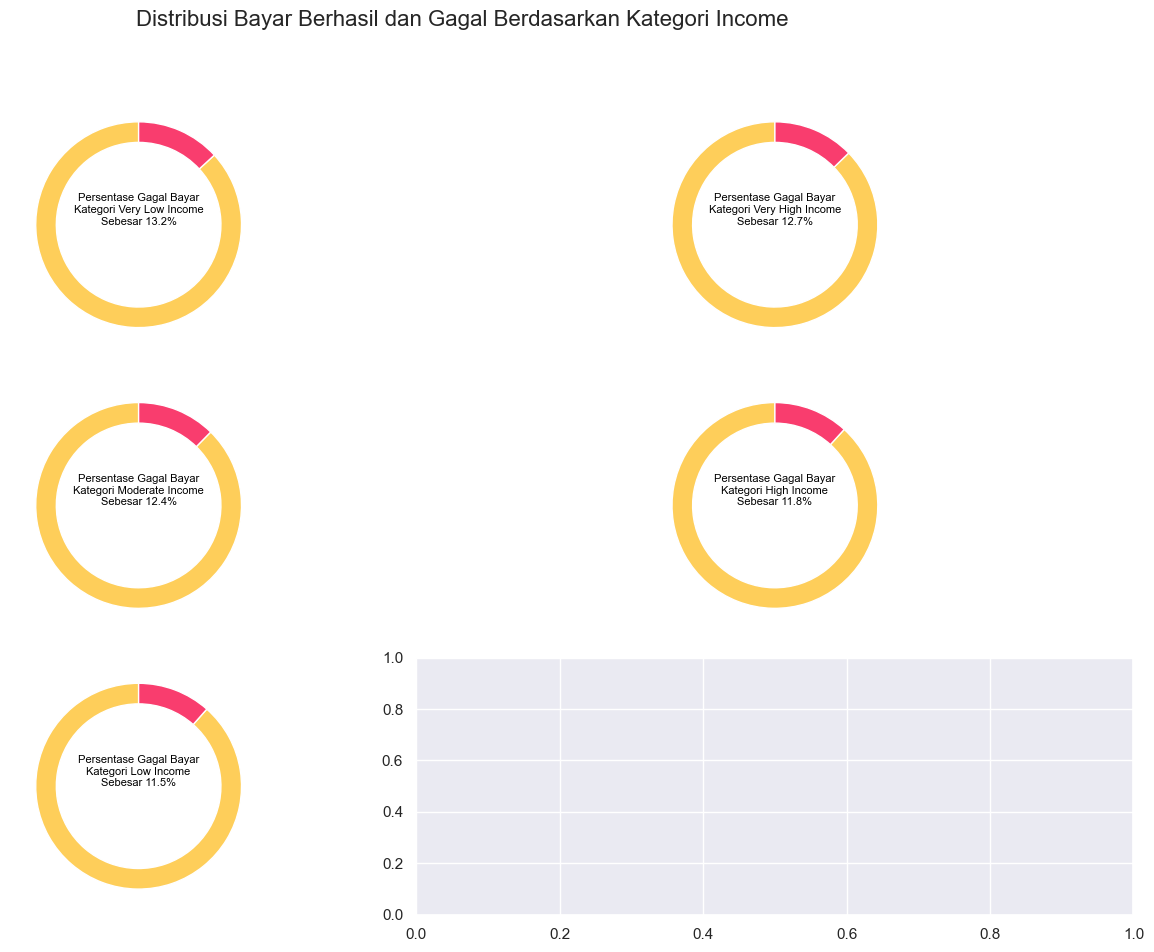

In [63]:
# Data yang diberikan
inc_grouped = {
    'Very Low Income': {'Berhasil Bayar': 43676, 'Gagal Bayar': 6623, 'pcg': 13.167260},
    'Very High Income': {'Berhasil Bayar': 43034, 'Gagal Bayar': 6275, 'pcg': 12.725872},
    'Moderate Income': {'Berhasil Bayar': 43897, 'Gagal Bayar': 6186, 'pcg': 12.351497},
    'High Income': {'Berhasil Bayar': 45207, 'Gagal Bayar': 6028, 'pcg': 11.765395},
    'Low Income': {'Berhasil Bayar': 45153, 'Gagal Bayar': 5884, 'pcg': 11.528891}
}

# Membuat subplot dengan 2 baris dan 2 kolom
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

# Loop melalui setiap kelompok pengalaman dan membuat donut chart
for i, (inc, data) in enumerate(inc_grouped.items()):
    # Data untuk pie chart
    data_values = [data['Berhasil Bayar'], data['Gagal Bayar']]
    labels = ['Berhasil Bayar', 'Gagal Bayar']
    pcg = data['pcg']
    
    # Menghitung indeks baris dan kolom
    row = i // 2
    col = i % 2

    # Membuat donut chart
    wedges, _ = axes[row, col].pie(data_values, startangle=90, wedgeprops=dict(width=0.2), colors=['#fece5a', '#f93d6e'])

    # Menambahkan lingkaran dalam berwarna putih untuk membuat donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    axes[row, col].add_artist(centre_circle)

    # Menambahkan informasi di tengah donut
    axes[row, col].text(0, 0, f'Persentase Gagal Bayar\nKategori {inc}\nSebesar {pcg:.1f}%', fontsize=8, color='black', ha='center')

# Menampilkan plot
plt.suptitle('Distribusi Bayar Berhasil dan Gagal Berdasarkan Kategori Income', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Kolom 'Married/Single' VS 'Risk_Flag'

In [19]:
status_grouped = df.groupby(['Married/Single', 'Risk_Flag']).size().unstack()
status_grouped['pcg'] = (status_grouped[1] / status_grouped.sum(axis=1)) * 100
status_grouped_sorted = status_grouped.sort_values(by='pcg', ascending=False)
status_grouped_sorted

Risk_Flag            0      1        pcg
Married/Single                          
single          197912  28360  12.533588
married          23092   2636  10.245647

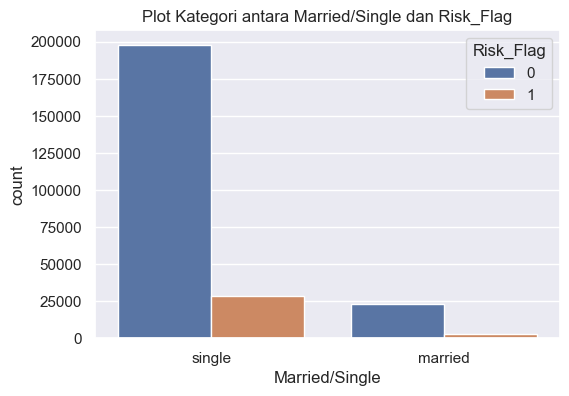

In [57]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Married/Single', hue='Risk_Flag', data=df)
plt.title('Plot Kategori antara Married/Single dan Risk_Flag', fontsize=12)
plt.xticks(rotation=0)
plt.show()

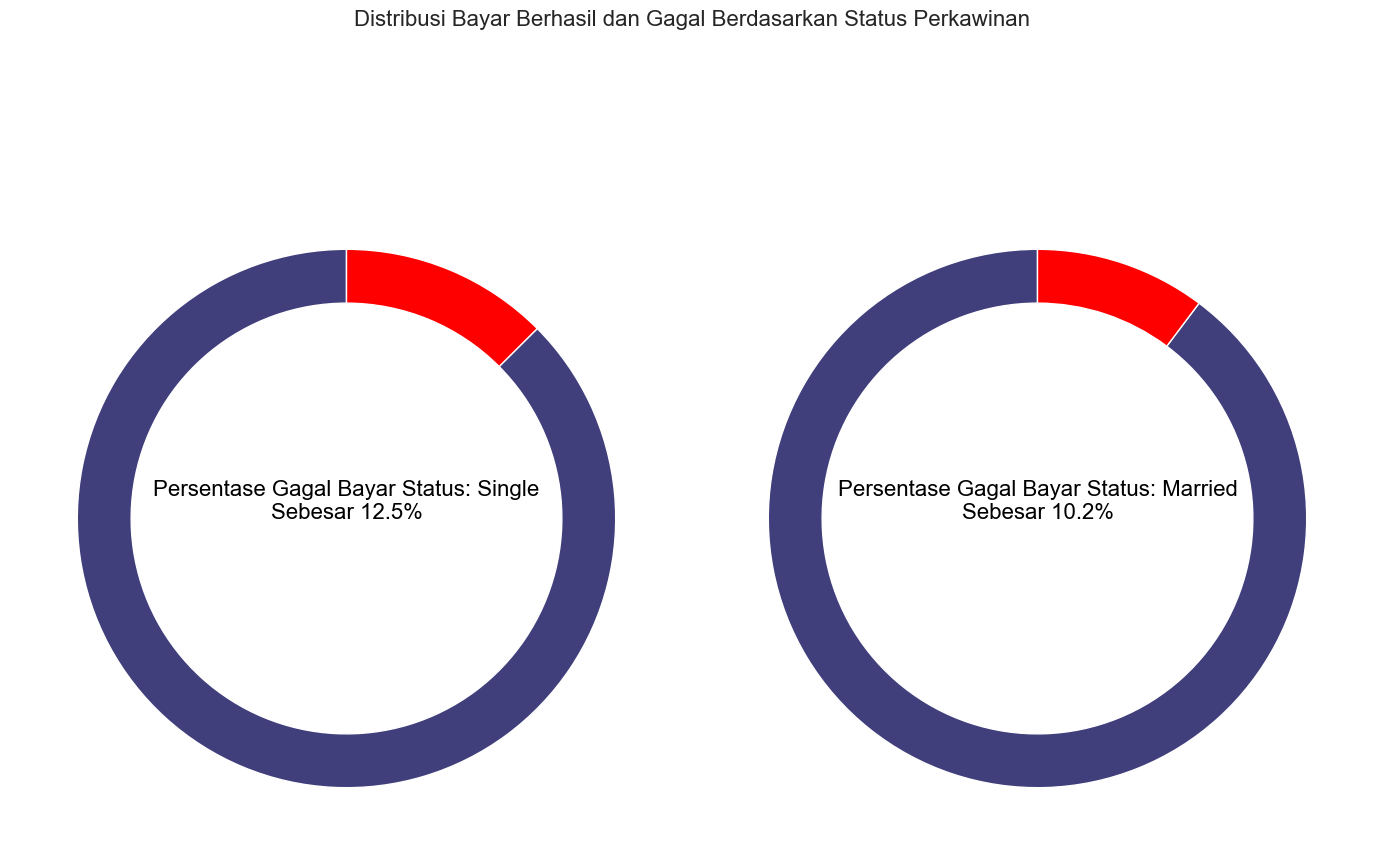

In [37]:
# Data yang diberikan
stat_grouped = {
    'Single': {'Berhasil Bayar': 197912, 'Gagal Bayar': 28360, 'pcg': 12.533588},
    'Married': {'Berhasil Bayar': 23092, 'Gagal Bayar': 2636, 'pcg': 10.245647}
}

# Membuat subplot dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))

# Loop melalui setiap kelompok status perkawinan dan membuat donut chart
for i, (stat, data) in enumerate(stat_grouped.items()):
    # Data untuk pie chart
    data_values = [data['Berhasil Bayar'], data['Gagal Bayar']]
    labels = ['Berhasil Bayar', 'Gagal Bayar']
    pcg = data['pcg']
    
    # Membuat donut chart
    wedges, _ = axes[i].pie(data_values, startangle=90, wedgeprops=dict(width=0.2), colors=['#403f7c', '#ff0000'])

    # Menambahkan lingkaran dalam berwarna putih untuk membuat donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    axes[i].add_artist(centre_circle)

    # Menambahkan informasi di tengah donut
    axes[i].text(0, 0, f'Persentase Gagal Bayar Status: {stat}\nSebesar {pcg:.1f}%', fontsize=16, color='black', ha='center')

# Menampilkan plot
plt.suptitle('Distribusi Bayar Berhasil dan Gagal Berdasarkan Status Perkawinan', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Kolom 'House_Ownership' VS 'Risk_Flag'

In [38]:
house_grouped = df.groupby(['House_Ownership', 'Risk_Flag']).size().unstack()
house_grouped['pcg'] = (house_grouped[1] / house_grouped.sum(axis=1)) * 100
house_grouped.sort_values(by='pcg', ascending=False)

Risk_Flag             0      1        pcg
House_Ownership                          
rented           202777  29121  12.557676
norent_noown       6469    715   9.952673
owned             11758   1160   8.979718

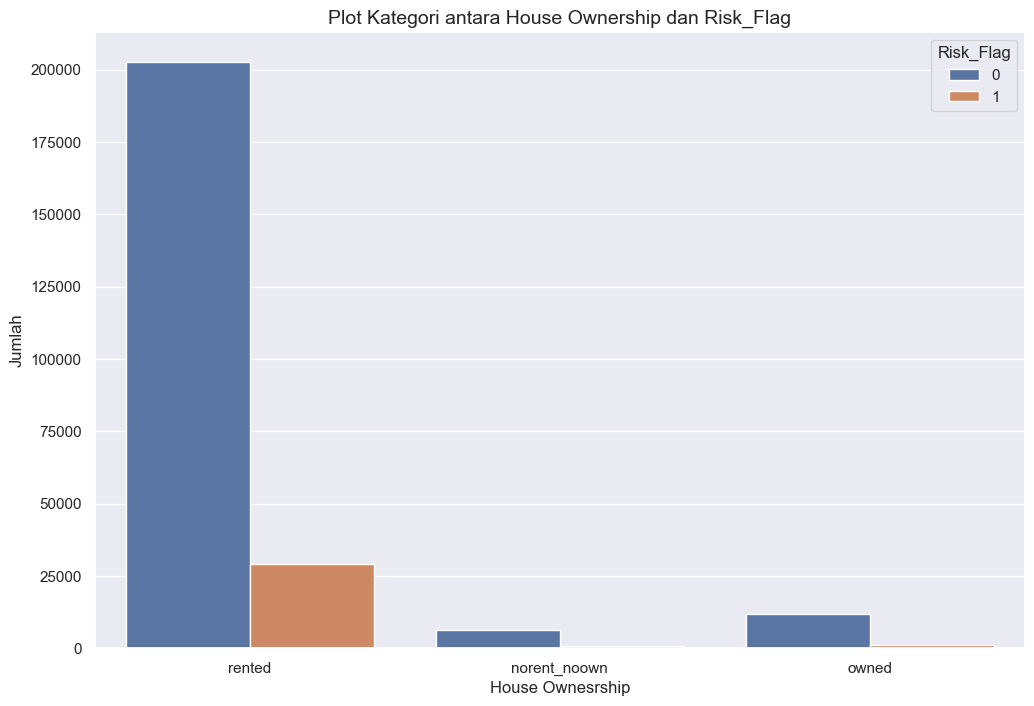

In [40]:
house_grouped = house_grouped.sort_values(by='pcg', ascending=False)

plt.figure(figsize=(12, 8))
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=df[df['House_Ownership'].isin(house_grouped.index)])
plt.title('Plot Kategori antara House Ownership dan Risk_Flag', fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('House Ownesrship', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.legend(title='Risk_Flag', loc='upper right')
plt.show()

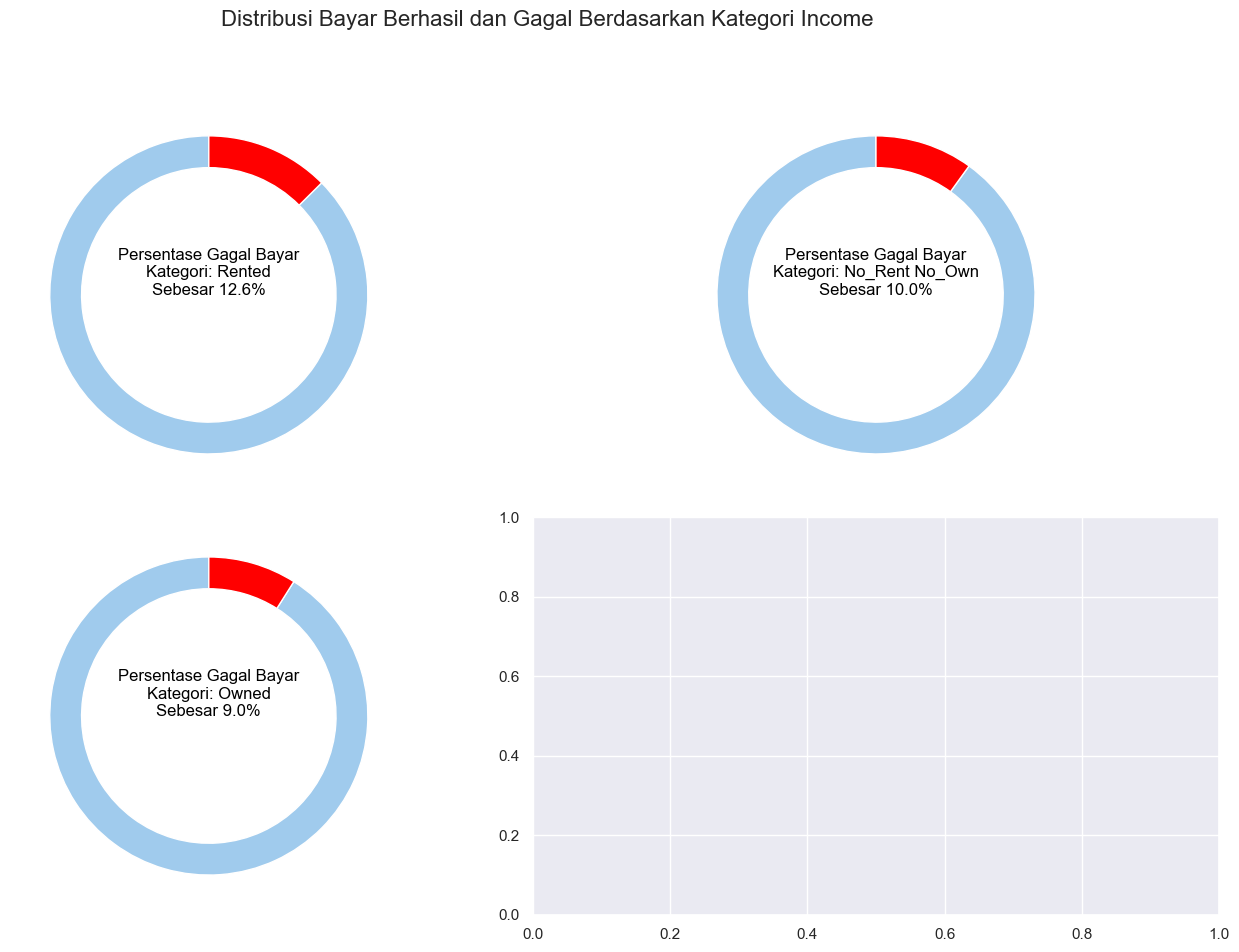

In [44]:
# Data yang diberikan
inc_grouped = {
    'Rented': {'Berhasil Bayar': 202777, 'Gagal Bayar': 29121, 'pcg': 12.557676},
    'No_Rent No_Own': {'Berhasil Bayar': 6469, 'Gagal Bayar': 715, 'pcg': 9.952673},
    'Owned': {'Berhasil Bayar': 11758, 'Gagal Bayar': 1160, 'pcg': 8.979718}
}

# Membuat subplot dengan 2 baris dan 2 kolom
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Loop melalui setiap kelompok pengalaman dan membuat donut chart
for i, (inc, data) in enumerate(inc_grouped.items()):
    # Data untuk pie chart
    data_values = [data['Berhasil Bayar'], data['Gagal Bayar']]
    labels = ['Berhasil Bayar', 'Gagal Bayar']
    pcg = data['pcg']
    
    # Menghitung indeks baris dan kolom
    row = i // 2
    col = i % 2

    # Membuat donut chart
    wedges, _ = axes[row, col].pie(data_values, startangle=90, wedgeprops=dict(width=0.2), colors=['#a0cbed', '#ff0000'])

    # Menambahkan lingkaran dalam berwarna putih untuk membuat donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    axes[row, col].add_artist(centre_circle)

    # Menambahkan informasi di tengah donut
    axes[row, col].text(0, 0, f'Persentase Gagal Bayar\nKategori: {inc}\nSebesar {pcg:.1f}%', fontsize=12, color='black', ha='center')

# Menampilkan plot
plt.suptitle('Distribusi Bayar Berhasil dan Gagal Berdasarkan Kategori Income', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Kolom 'Profession' VS 'Risk_Flag'

#### Profession By Grouped

In [72]:
profession_map_grouped = df.groupby(['profession_map', 'Risk_Flag']).size().unstack()
profession_map_grouped['pcg'] = (profession_map_grouped[1] / profession_map_grouped.sum(axis=1)) * 100
profession_map_grouped = profession_map_grouped.sort_values(by='pcg', ascending=False).head(10)
profession_map_grouped

Risk_Flag               0     1        pcg
profession_map                            
Government          24698  3799  13.331228
Aviation            13176  1991  13.127184
Science/Research    25839  3833  12.917902
Hospitality          8549  1264  12.880872
Administration       8772  1279  12.725102
IT/Software         18179  2632  12.647158
Other               20619  2921  12.408666
Art                  8895  1225  12.104743
Design              12834  1725  11.848341
Finance/Accounting  12556  1677  11.782477

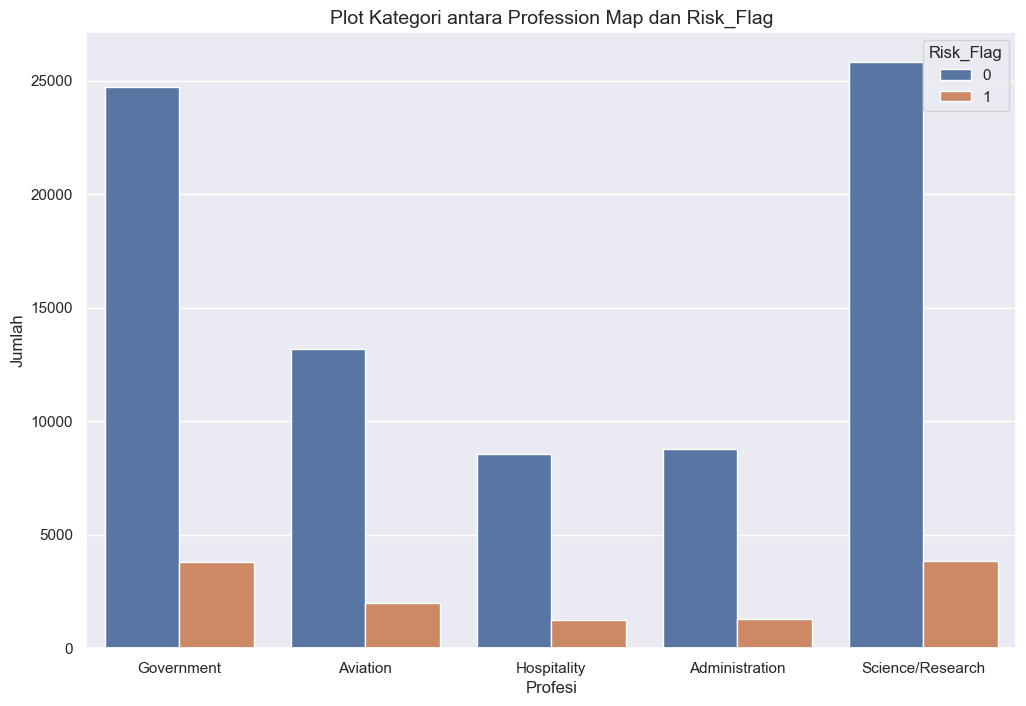

In [73]:
top_profession_maps = profession_map_grouped.sort_values(by='pcg', ascending=False).head(5)

plt.figure(figsize=(12, 8))
sns.countplot(x='profession_map', hue='Risk_Flag', data=df[df['profession_map'].isin(top_profession_maps.index)])
plt.title('Plot Kategori antara Profession Map dan Risk_Flag', fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Profesi', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.legend(title='Risk_Flag', loc='upper right')
plt.show()

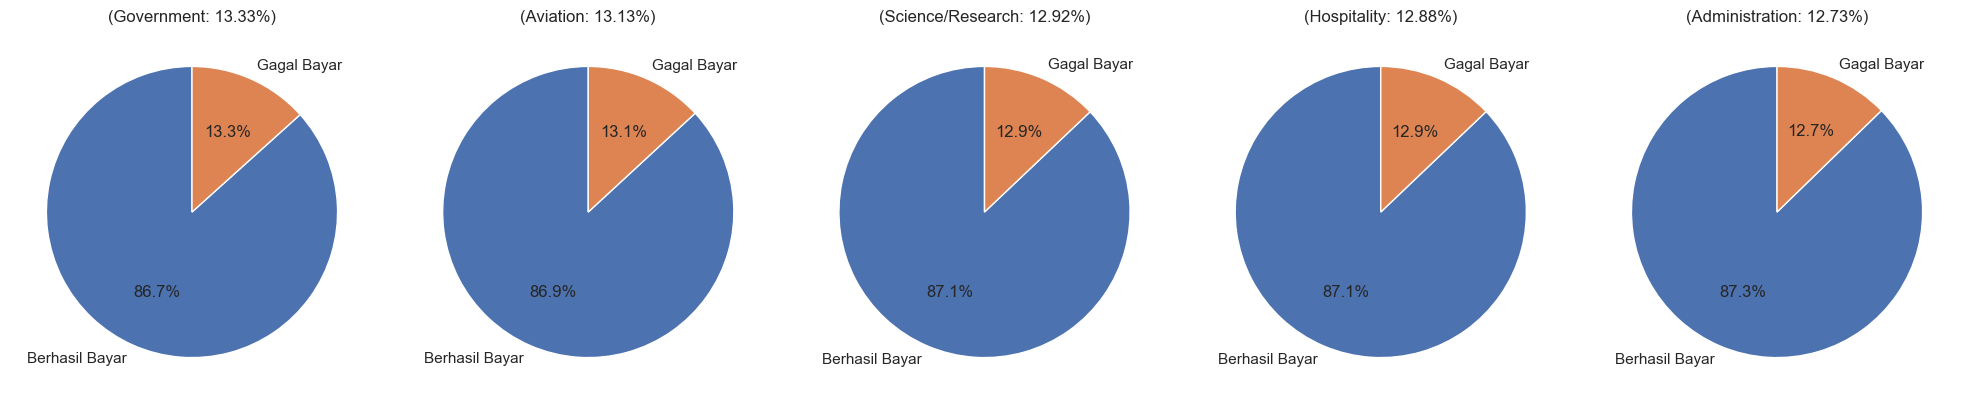

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

for i, profession in enumerate(top_profession_maps.index):
    axes[i].pie(top_profession_maps.loc[profession, [0, 1]], labels=['Berhasil Bayar', 'Gagal Bayar'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'({profession}: {top_profession_maps["pcg"][profession]:.2f}%)', fontsize=12)

plt.tight_layout()
plt.show()

#### Profession By Specific

In [75]:
profession_grouped = df.groupby(['Profession', 'Risk_Flag']).size().unstack()
profession_grouped['pcg'] = (profession_grouped[1] / profession_grouped.sum(axis=1)) * 100
profession_grouped.sort_values(by='pcg', ascending=False).head()

Risk_Flag                0    1        pcg
Profession                                
Police_officer        4209  826  16.405164
Chartered_Accountant  3803  690  15.357222
Army_officer          3952  709  15.211328
Surveyor              4000  714  15.146373
Software_Developer    4303  750  14.842668

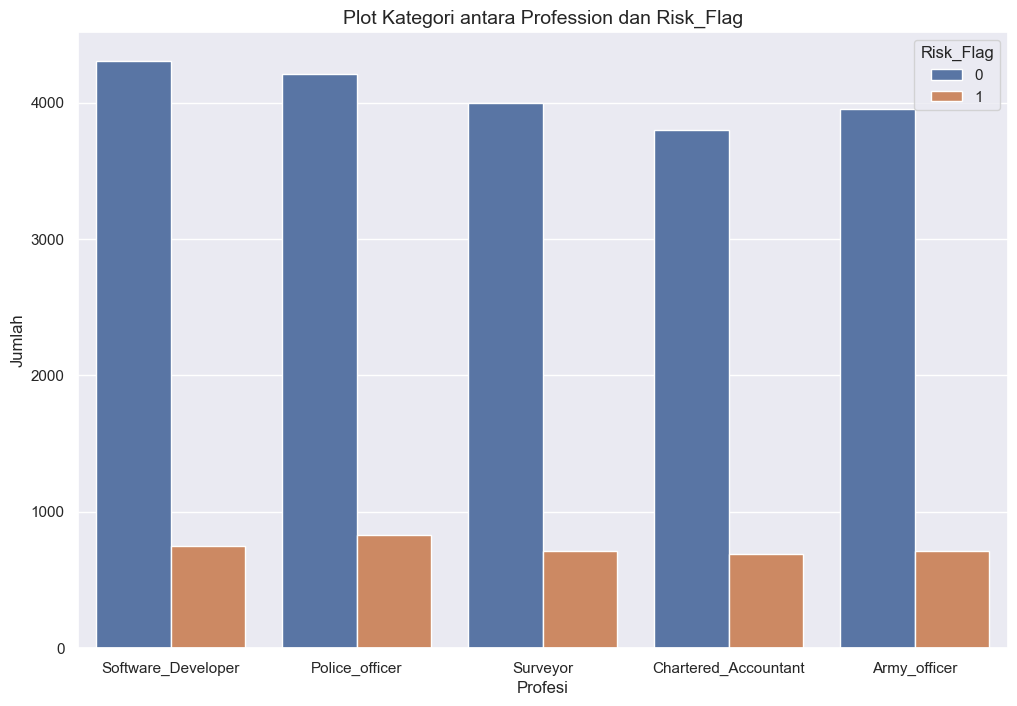

In [76]:
top_professions = profession_grouped.sort_values(by='pcg', ascending=False).head(5)

plt.figure(figsize=(12, 8))
sns.countplot(x='Profession', hue='Risk_Flag', data=df[df['Profession'].isin(top_professions.index)])
plt.title('Plot Kategori antara Profession dan Risk_Flag', fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Profesi', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.legend(title='Risk_Flag', loc='upper right')
plt.show()

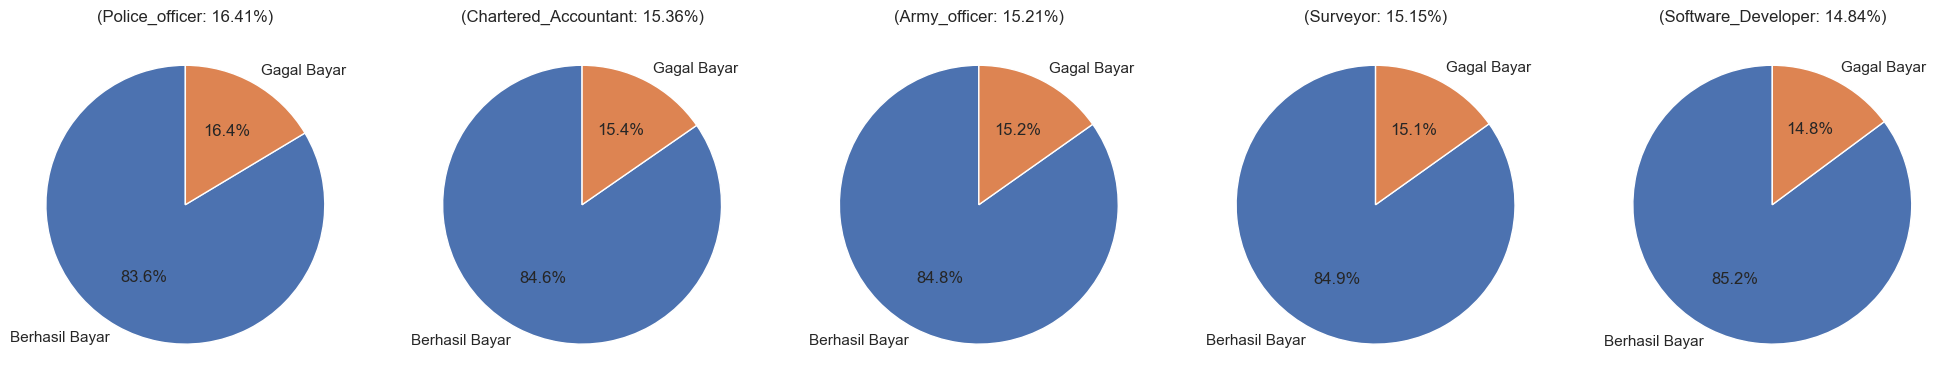

In [77]:
top_professions = profession_grouped.sort_values(by='pcg', ascending=False).head(5)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

for i, profession in enumerate(top_professions.index):
    axes[i].pie(top_professions.loc[profession, [0, 1]], labels=['Berhasil Bayar', 'Gagal Bayar'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'({profession}: {top_professions["pcg"][profession]:.2f}%)', fontsize=12)

plt.tight_layout()
plt.show()

### Kolom 'CITY' VS 'Risk_Flag'

In [103]:
city_grouped = df.groupby(['CITY', 'Risk_Flag']).size().unstack()
city_grouped['pcg'] = (city_grouped[1] / city_grouped.sum(axis=1)) * 100
top_cities = city_grouped.sort_values(by='pcg', ascending=False).head(10)
top_cities.describe(percentiles=[.10, .20, .30, .40, .50, .60, .70, .80, .90, .95])

Risk_Flag           0           1        pcg
count       10.000000   10.000000  10.000000
mean       565.200000  187.800000  25.314696
std        167.042776   43.340512   2.971649
min        335.000000  118.000000  22.568093
10%        371.900000  121.600000  23.089297
20%        402.400000  158.800000  23.705596
30%        436.300000  170.800000  23.862712
40%        506.800000  183.400000  23.880072
50%        578.000000  194.500000  23.921036
60%        628.800000  201.200000  24.487723
70%        675.300000  212.600000  25.709065
80%        725.800000  228.800000  26.811219
90%        760.900000  233.100000  27.807399
95%        778.450000  238.050000  30.213419
max        796.000000  243.000000  32.619440

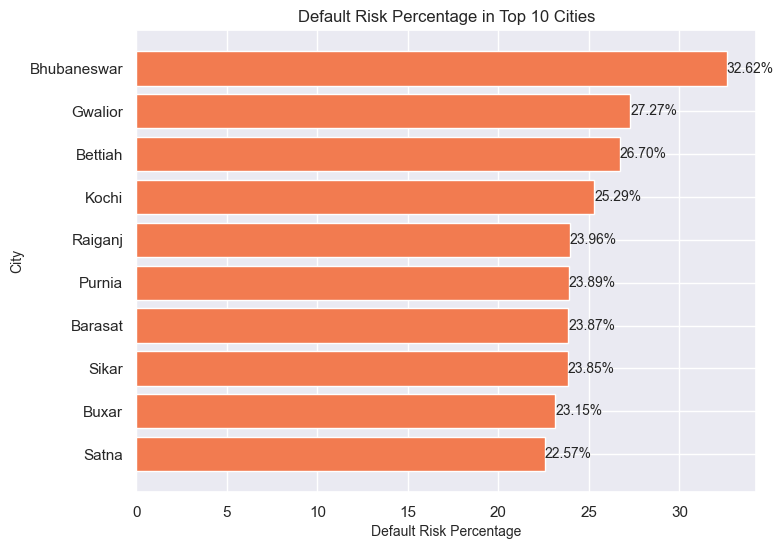

In [85]:
plt.figure(figsize=(8, 6))
bars = plt.barh(top_cities.index, top_cities['pcg'], color='#f27b50')

# Menambahkan label di atas bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', ha='left', fontsize=10)

# Menambahkan judul dan label sumbu
plt.title('Default Risk Percentage in Top 10 Cities', fontsize=12)
plt.xlabel('Default Risk Percentage', fontsize=10)
plt.ylabel('City', fontsize=10)

# Menampilkan plot
plt.gca().invert_yaxis()  
plt.show()

### Kolom 'State' VS 'Risk_Flag'

#### State By Grouped

In [35]:
zone_grouped = df.groupby(['Zone', 'Risk_Flag']).size().unstack().sort_values(by=1, ascending=False)
zone_grouped['pcg'] = (zone_grouped[1] / zone_grouped.sum(axis=1)) * 100
zone_grouped.sort_values(by='pcg', ascending=False)

Risk_Flag            0      1        pcg
Zone                                    
North East Zone   8806   1371  13.471554
Central Zone      3323    511  13.328117
East Zone        28961   4442  13.298207
South Zone       23312   3305  12.416876
Unknown          97531  13664  12.288322
West Zone        40614   5530  11.984223
North Zone       18457   2173  10.533204

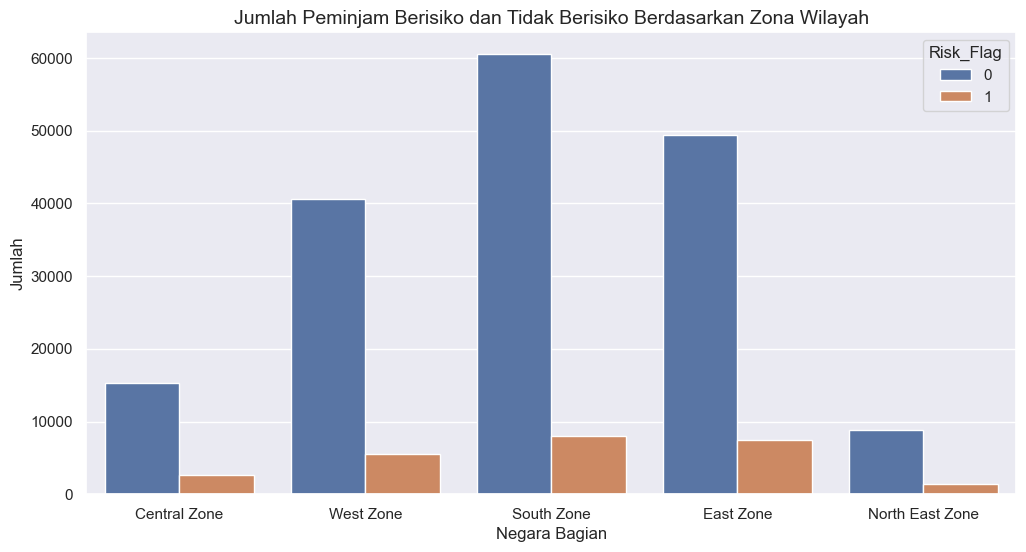

In [84]:
top_zone = zone_grouped.sort_values(by='pcg', ascending=False).head()

plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Zone'].isin(top_zone.index)], x='Zone', hue='Risk_Flag')
plt.title('Jumlah Peminjam Berisiko dan Tidak Berisiko Berdasarkan Zona Wilayah', fontsize=14)
plt.xlabel('Negara Bagian', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Risk_Flag', loc='upper right')
plt.show()

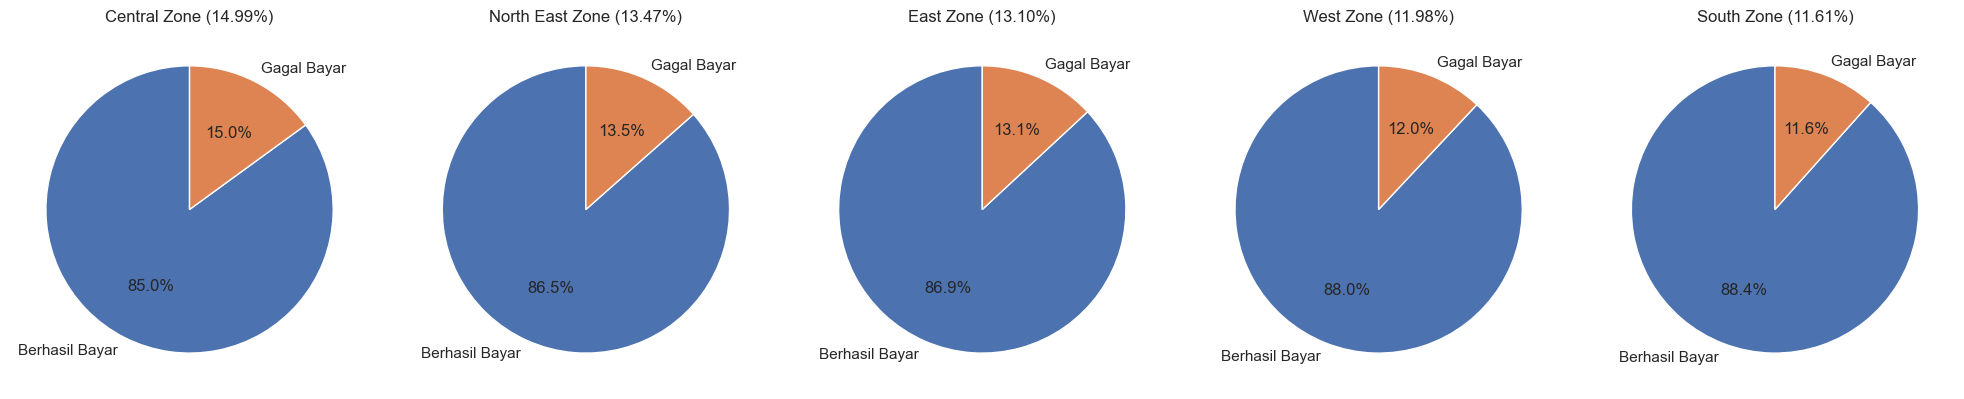

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, zone in enumerate(top_zone.index):
    sizes = top_zone.loc[zone, [0, 1]]
    axes[i].pie(sizes, labels=['Berhasil Bayar', 'Gagal Bayar'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{zone} ({top_zone["pcg"][zone]:.2f}%)', fontsize=12)

plt.tight_layout()
plt.show()

#### State By Specific

In [47]:
state_grouped = df.groupby(['STATE', 'Risk_Flag']).size().unstack().sort_values(by=1, ascending=False)
state_grouped['pcg'] = (state_grouped[1] / state_grouped.sum(axis=1)) * 100
state_grouped.sort_values(by='pcg', ascending=False).describe(percentiles=[.10, .20, .30, .40, .50, .60, .70, .80, .84, .90])

Risk_Flag             0            1        pcg
count         28.000000    28.000000  28.000000
mean        7893.000000  1107.000000  12.472944
std         7639.795591  1042.785017   3.233012
min          580.000000    28.000000   4.605263
10%          670.900000   105.900000   9.210418
20%          959.400000   148.400000  10.371906
30%         1899.200000   297.200000  11.353081
40%         4234.800000   561.400000  11.748727
50%         5524.000000   950.000000  12.617155
60%         7082.000000  1021.800000  13.080731
70%         9846.700000  1282.300000  13.327838
80%        13675.400000  1990.400000  14.186339
84%        16439.880000  2454.040000  15.058711
90%        21040.400000  2907.000000  16.142133
max        25703.000000  3440.000000  21.554770

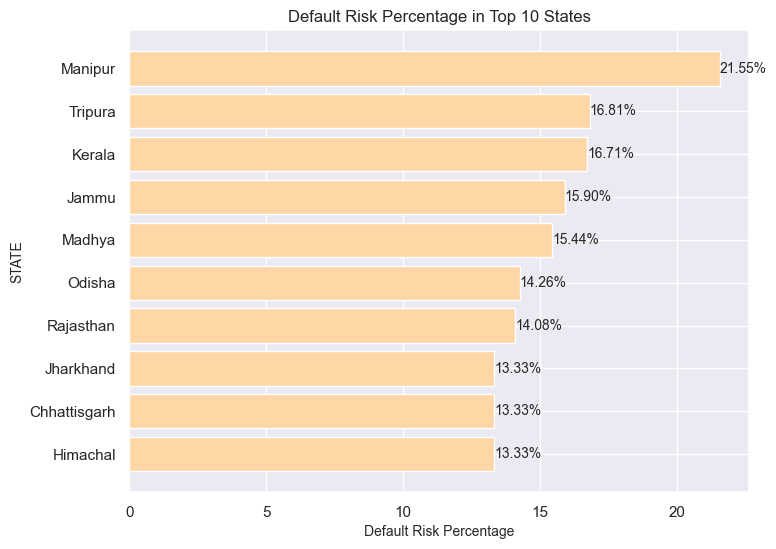

In [51]:
state_grouped_sorted = state_grouped.sort_values(by='pcg', ascending=False).head(10)

# Membuat plot
plt.figure(figsize=(8, 6))
bars = plt.barh(state_grouped_sorted.index, state_grouped_sorted['pcg'], color='#ffd6a5')

# Menambahkan label di atas bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', ha='left', fontsize=10)

# Menambahkan judul dan label sumbu
plt.title('Default Risk Percentage in Top 10 States', fontsize=12)
plt.xlabel('Default Risk Percentage', fontsize=10)
plt.ylabel('STATE', fontsize=10)

# Menampilkan plot
plt.gca().invert_yaxis()  # Memutar sumbu y agar negara bagian dengan risiko tertinggi berada di bagian atas
plt.show()

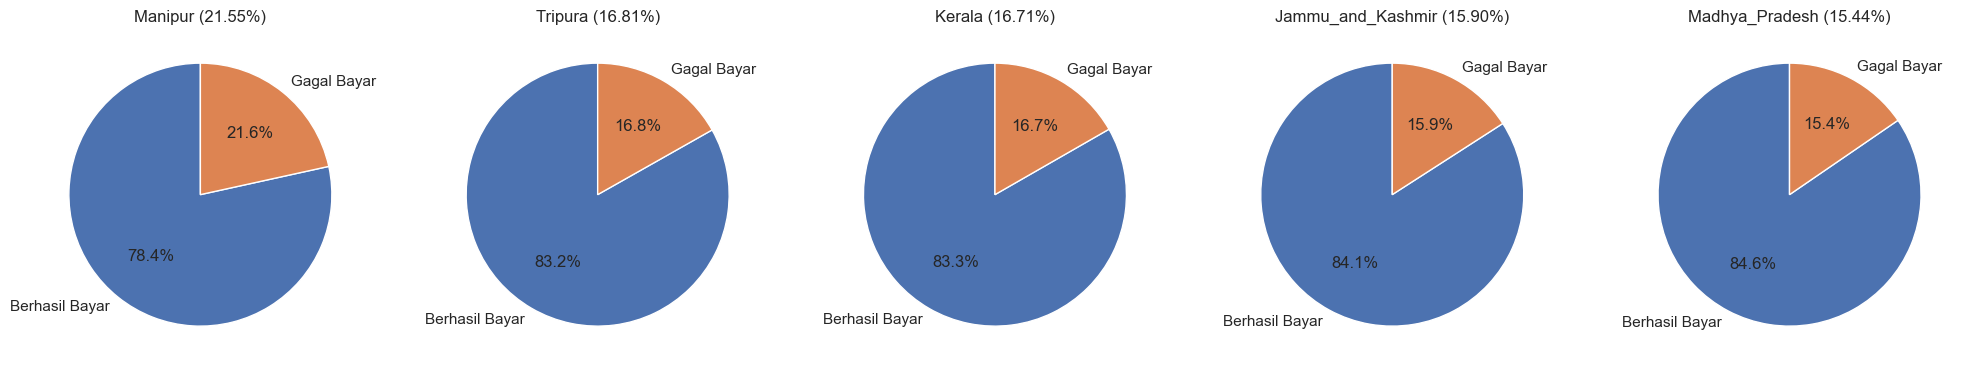

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, state in enumerate(top_states.index):
    sizes = top_states.loc[state, [0, 1]]
    axes[i].pie(sizes, labels=['Berhasil Bayar', 'Gagal Bayar'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{state} ({top_states["pcg"][state]:.2f}%)', fontsize=12)

plt.tight_layout()
plt.show()

### <font color = 'darkgreen'> 3. Multivariate Analysis </font>

In [71]:
num_cols = numeric_cols.drop(['Id', 'Age_Group_Encode', 'Income_Category_Enocode', 'Experience_Category_Encode', 
                                      'profession_map_encode', 'Zone_Encode'], axis=1)

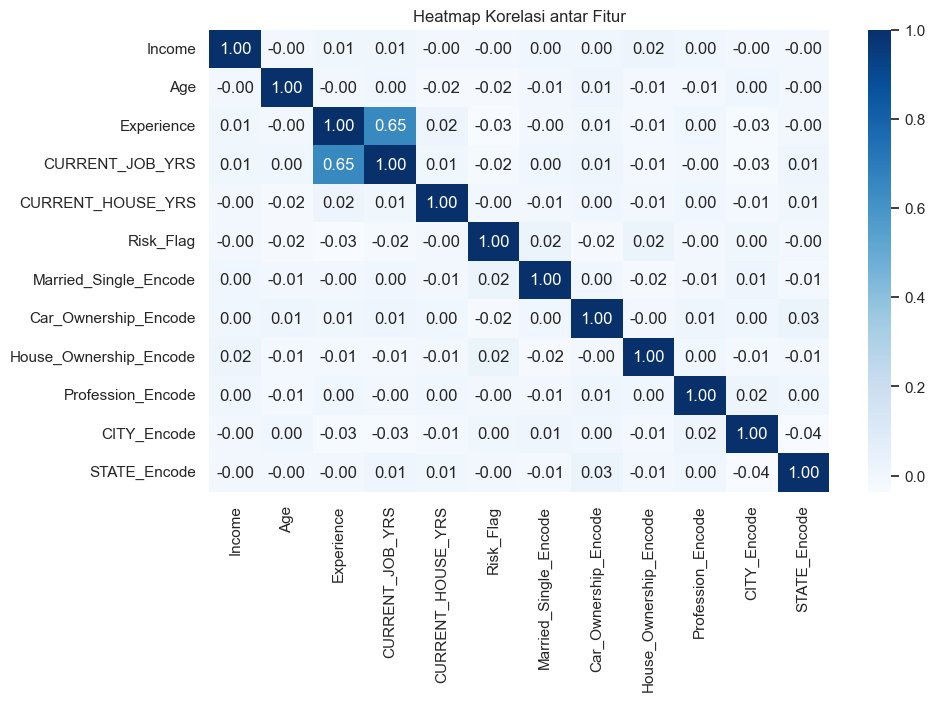

In [85]:
plt.figure(figsize=(10, 6))
sns.heatmap(num_cols.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Heatmap Korelasi antar Fitur', fontsize=12)
plt.show()

### Uji ANOVA Test

In [56]:
var_test = numeric_cols.copy()
var_test = numeric_cols.drop(['Risk_Flag', 'Id'], axis=1)
var_target = df['Risk_Flag']

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_features_anova = SelectKBest(score_func=f_classif, k=10)

In [51]:
fit_anova = best_features_anova.fit(var_test, var_target)

In [52]:
dfscores_anova = pd.DataFrame(fit_anova.scores_)
dfcolumns_anova = pd.DataFrame(var_test.columns)
feature_scores_anova = pd.concat([dfcolumns_anova, dfscores_anova], axis=1)
feature_scores_anova.columns = ['Specs', 'Score']

In [54]:
feature_scores_anova_sorted = feature_scores_anova.sort_values(by='Score', ascending=False)
feature_scores_anova_sorted

Specs       Score
2                   Experience  300.692307
6         Car_Ownership_Encode  145.666154
7       House_Ownership_Encode  140.697991
13  Experience_Category_Encode  138.589863
1                          Age  119.918507
5        Married_Single_Encode  112.153048
11            Age_Group_Encode  105.405195
3              CURRENT_JOB_YRS   72.348526
15                 Zone_Encode   23.308070
14       profession_map_encode    6.125650
12     Income_Category_Enocode    6.112534
8            Profession_Encode    6.050234
9                  CITY_Encode    5.201033
4            CURRENT_HOUSE_YRS    4.823851
10                STATE_Encode    3.077653
0                       Income    2.407945

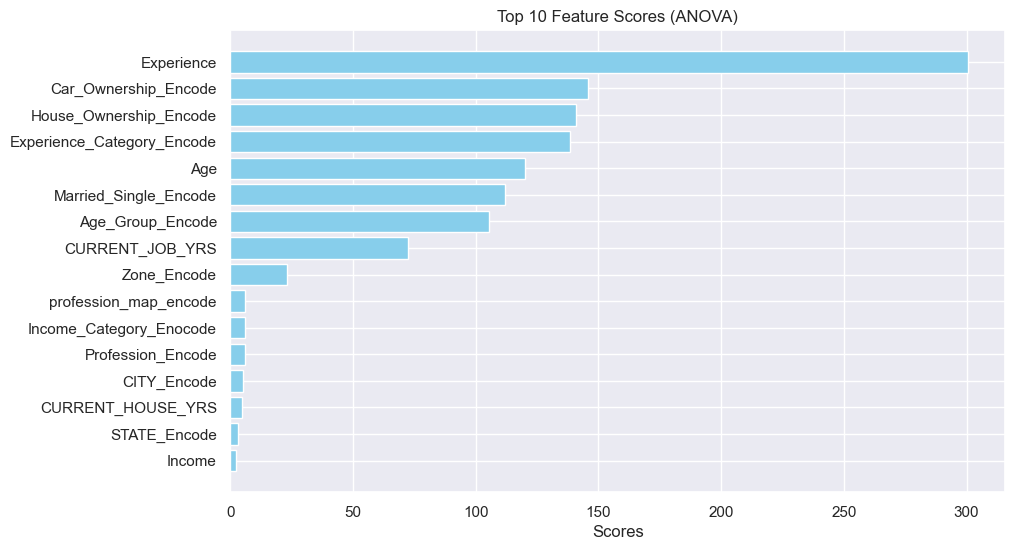

In [55]:
plt.figure(figsize=(10,6))
plt.barh(feature_scores_anova_sorted['Specs'], feature_scores_anova_sorted['Score'], color='skyblue')
plt.xlabel('Scores')
plt.title('Top 10 Feature Scores (ANOVA)')
plt.gca().invert_yaxis()  
plt.show()

### Uji Chi-Square Test

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [44]:
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(var_test, var_target)

In [45]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(var_test.columns)

In [49]:
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Specs', 'Score']
feature_scores_sorted = feature_scores.sort_values(by='Score', ascending=False)
feature_scores_sorted

Specs         Score
0                       Income  3.992087e+06
2                   Experience  1.073079e+03
1                          Age  6.986581e+02
9                  CITY_Encode  2.804477e+02
3              CURRENT_JOB_YRS  1.518872e+02
13  Experience_Category_Encode  1.224158e+02
6         Car_Ownership_Encode  1.016771e+02
11            Age_Group_Encode  8.620915e+01
8            Profession_Encode  5.192321e+01
10                STATE_Encode  1.909175e+01
15                 Zone_Encode  1.569268e+01
5        Married_Single_Encode  1.144529e+01
7       House_Ownership_Encode  1.141555e+01
14       profession_map_encode  1.106095e+01
12     Income_Category_Enocode  5.096287e+00
4            CURRENT_HOUSE_YRS  7.869449e-01

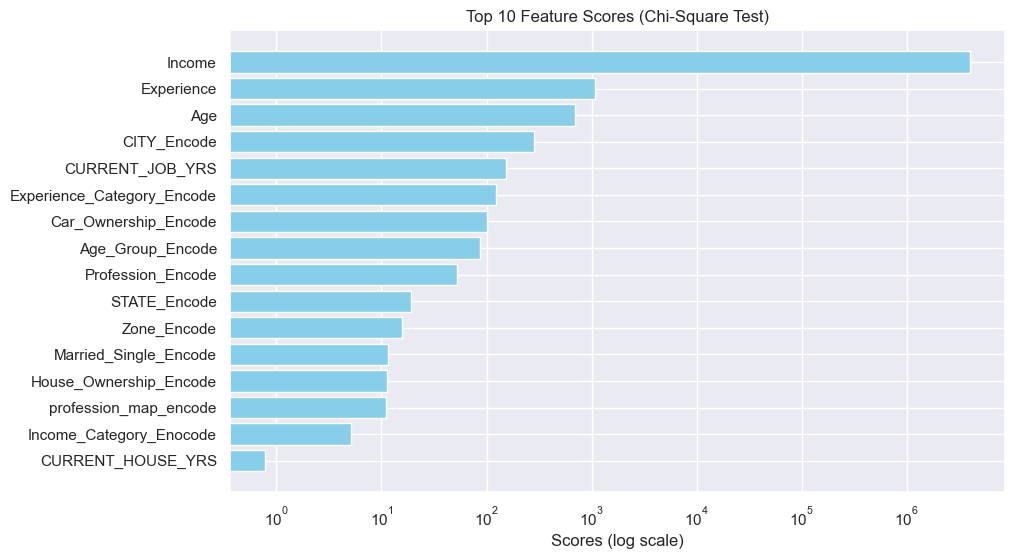

In [68]:
plt.figure(figsize=(10,6))
plt.barh(feature_scores_sorted['Specs'], feature_scores_sorted['Score'], color='skyblue')
plt.xscale('log') 
plt.xlabel('Scores (log scale)')
plt.title('Top 10 Feature Scores (Chi-Square Test)')
plt.gca().invert_yaxis() 
plt.show()

## <font color = 'green'> Feature Selection </font>

In [20]:
numeric_cols.columns

Index(['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag', 'Married_Single_Encode',
       'Car_Ownership_Encode', 'House_Ownership_Encode', 'Profession_Encode',
       'CITY_Encode', 'STATE_Encode', 'Age_Group_Encode',
       'Income_Category_Enocode', 'Experience_Category_Encode',
       'profession_map_encode', 'Zone_Encode'],
      dtype='object')

In [56]:
X = numeric_cols.drop(['Id', 'STATE_Encode', 'Risk_Flag', 'Experience_Category_Encode', 'profession_map_encode',
                      'Income_Category_Enocode', 'Age_Group_Encode', 'Married_Single_Encode'], axis=1)
y = numeric_cols[['Risk_Flag']]

## <font color = 'green'> Pemodelan ML </font>

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [58]:
y_train.value_counts()

Risk_Flag
0            165796
1             23204
Name: count, dtype: int64

#### SMOTE

In [59]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [60]:
y_train_resampled.value_counts()

Risk_Flag
0            165796
1            165796
Name: count, dtype: int64

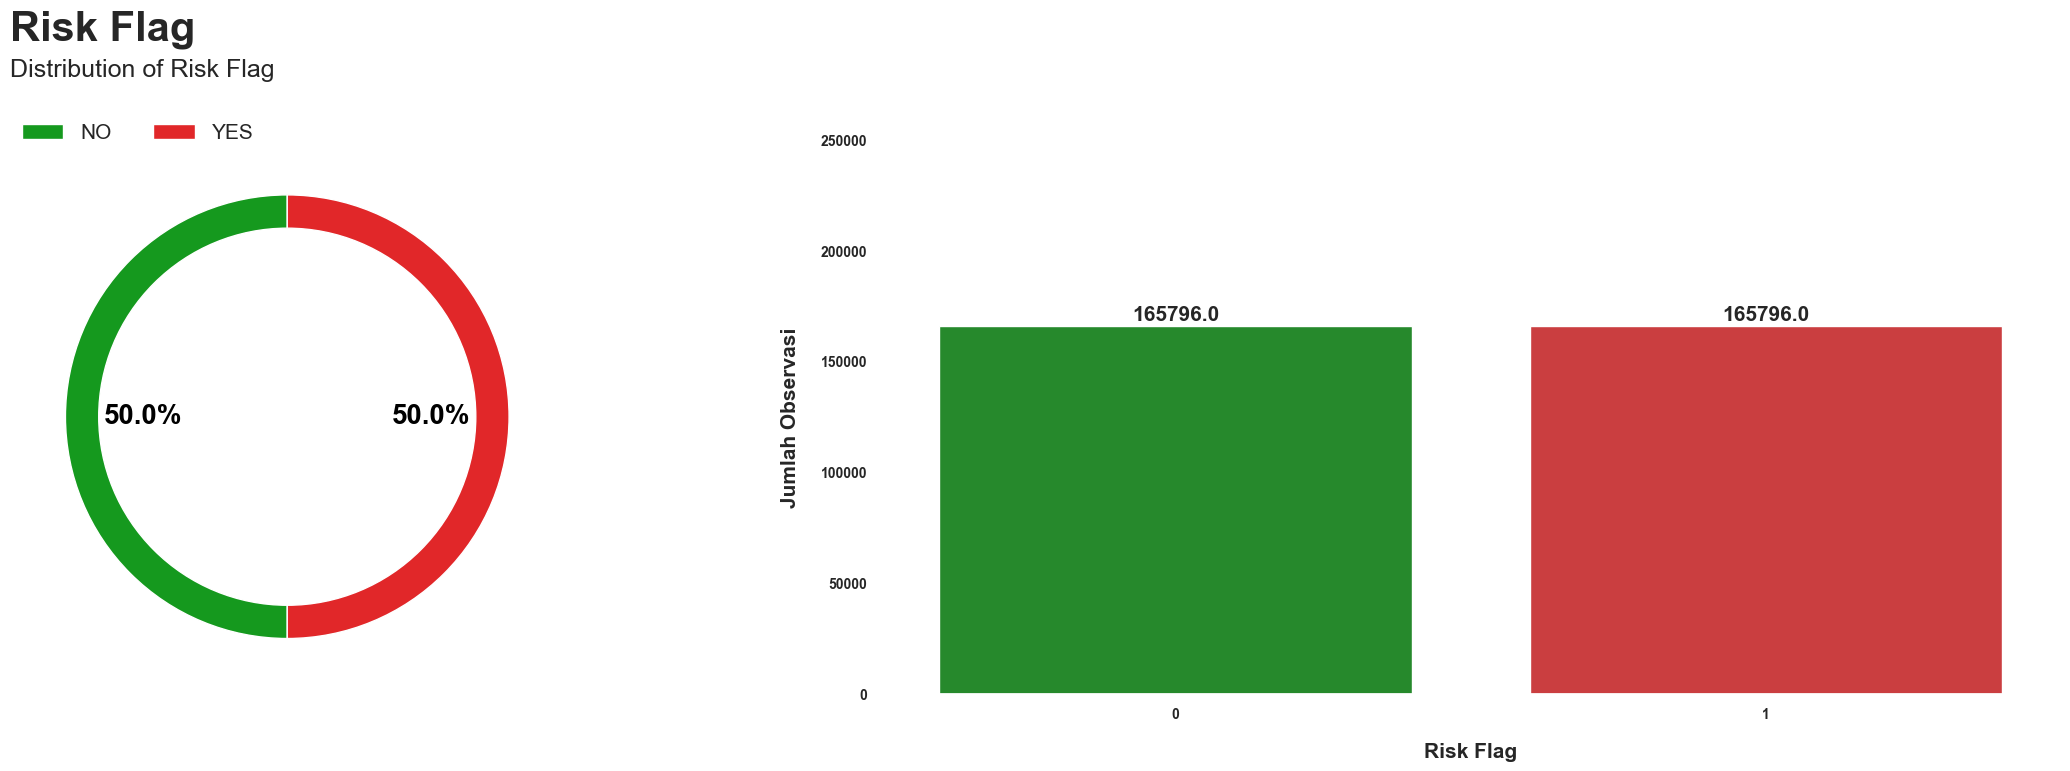

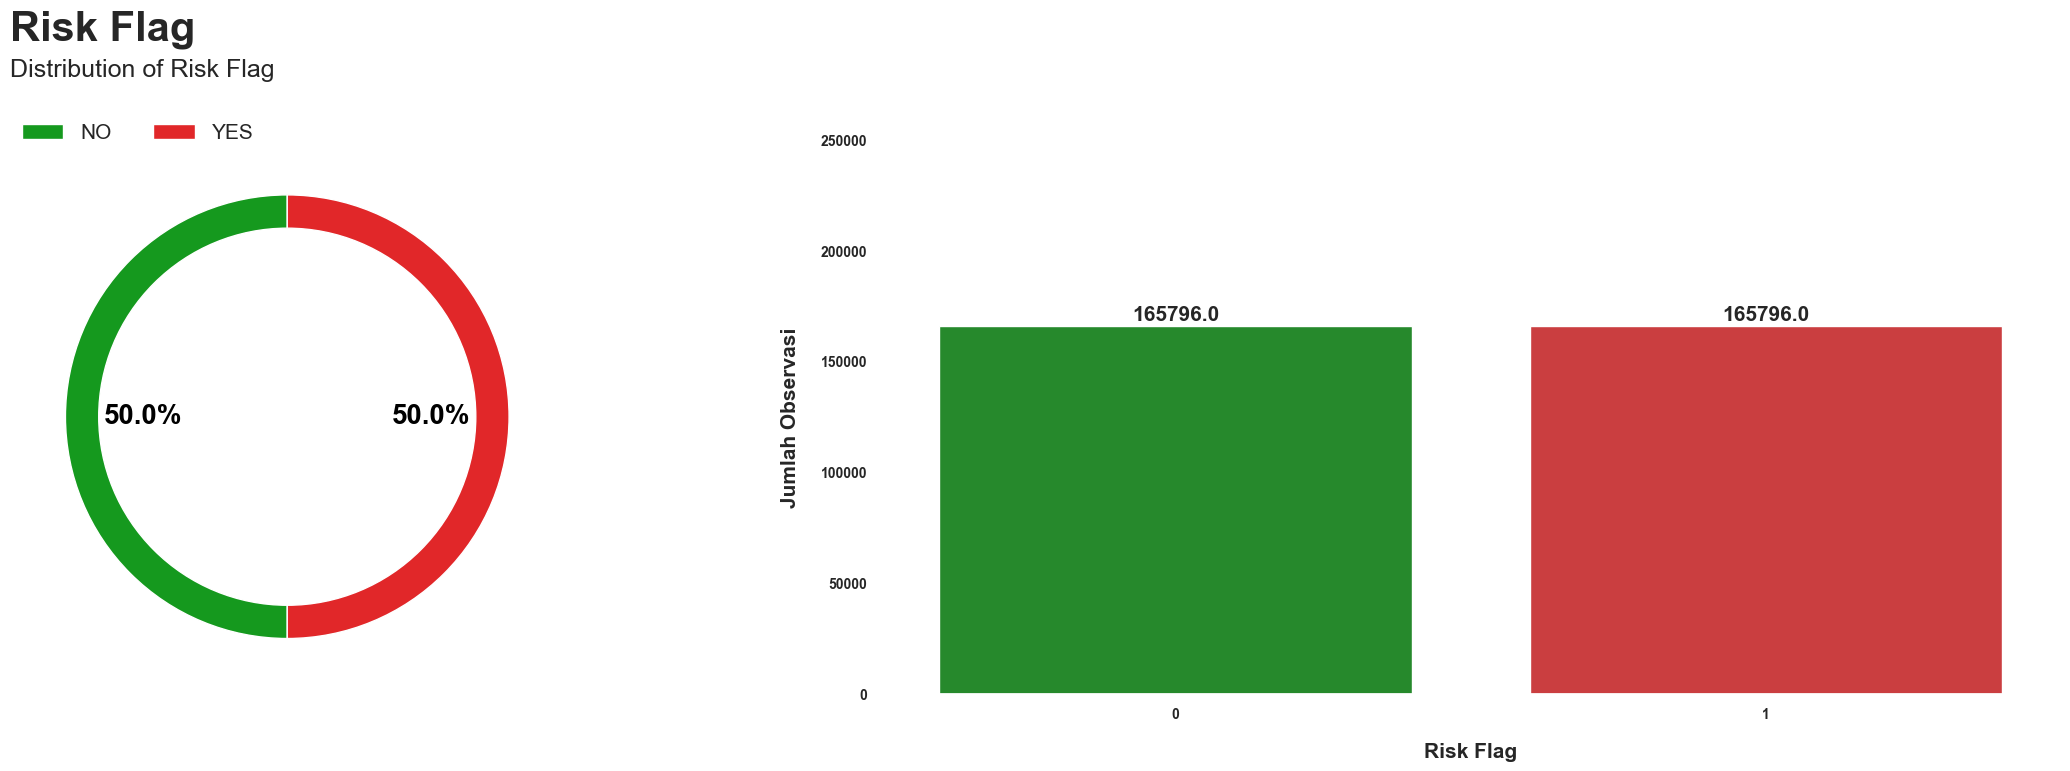

In [65]:
df_func = y_train_resampled.value_counts()

count_pie_plot(
    datapie= df_func,
    datacount= y_train_resampled,
    colcount= "Risk_Flag",
    colpiey= df_func.values,
    text1= "Risk Flag",
    pielabels= ["NO", "YES"],
    text2= "Distribution of Risk Flag",
    piecomap= ["#15991e", "#e12729"],
    countcomap= ["#15991e", "#e12729"],
    xlabel= "Risk Flag",
    piefs= 20,
    yplus= 5000,
    ylabel= "Jumlah Observasi",
    xticklabel= ["0", "1"],
    yticklabel= list(np.arange(0, 260000, 50000)),
    ystart= 0,
    yend= 250000,
)

#### Standarisasi

In [114]:
"""
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
"""

### <font color = 'darkred'> Logistic Regression </font>

In [86]:
from sklearn.linear_model import LogisticRegression

In [170]:
X = numeric_cols.drop(['Id', 'Risk_Flag'], axis=1)
y = numeric_cols[['Risk_Flag']]

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [172]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [173]:
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [197]:
best_params = {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}

In [198]:
logistic_model = LogisticRegression(**best_params)

In [199]:
cv_scores = cross_val_score(logistic_model, X_train_resampled_scaled, y_train_resampled, cv=5)

In [200]:
logistic_model.fit(X_train_resampled_scaled, y_train_resampled)

LogisticRegression(C=0.001, penalty='l1', solver='saga')

In [201]:
y_train_pred = logistic_model.predict(X_train_resampled_scaled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_f1_score = f1_score(y_train_resampled, y_train_pred)

In [202]:
y_pred_test = logistic_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test)

In [203]:
print("Akurasi pada data pelatihan:", train_accuracy)
print("Akurasi pada data pengujian:", test_accuracy)

Akurasi pada data pelatihan: 0.5759547878115274
Akurasi pada data pengujian: 0.5540793650793651


In [204]:
print(f"F1-Score pada data pelatihan: {train_f1_score:.2f}")
print(f"F1-Score pada data pengujian: {test_f1_score:.2f}")

F1-Score pada data pelatihan: 0.58
F1-Score pada data pengujian: 0.22


In [205]:
y_pred = logistic_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.56      0.69     55208
           1       0.14      0.52      0.22      7792

    accuracy                           0.55     63000
   macro avg       0.52      0.54      0.46     63000
weighted avg       0.80      0.55      0.63     63000



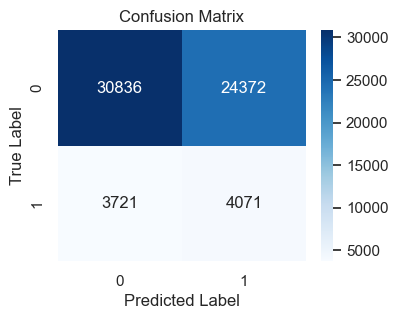

In [206]:
y_pred = logistic_model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [207]:
print("Hasil Cross-Validation:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold-{i}: {score}")

Hasil Cross-Validation:
Fold-1: 0.549405147846017
Fold-2: 0.5818996064476244
Fold-3: 0.5786664254048675
Fold-4: 0.5814107783708797
Fold-5: 0.5829488223408426


In [208]:
mean_cv_score = cv_scores.mean()
print(f"Rata-rata skor cross-validation: {mean_cv_score}")

Rata-rata skor cross-validation: 0.5748661560820463


In [209]:
feature_importance = abs(logistic_model.coef_[0])
feature_names = X.columns

# Membuat DataFrame untuk menyimpan feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Mengurutkan DataFrame berdasarkan nilai importance secara descending
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Menampilkan feature importance
print(feature_importance_df)

                       Feature  Importance
0                       Income    0.000000
3              CURRENT_JOB_YRS    0.000000
5        Married_Single_Encode    0.000000
10                STATE_Encode    0.000000
14       profession_map_encode    0.000000
8            Profession_Encode    0.001149
9                  CITY_Encode    0.010920
7       House_Ownership_Encode    0.021721
12     Income_Category_Enocode    0.038188
4            CURRENT_HOUSE_YRS    0.050734
15                 Zone_Encode    0.051748
13  Experience_Category_Encode    0.096333
2                   Experience    0.104105
6         Car_Ownership_Encode    0.149322
1                          Age    0.372288
11            Age_Group_Encode    0.459825


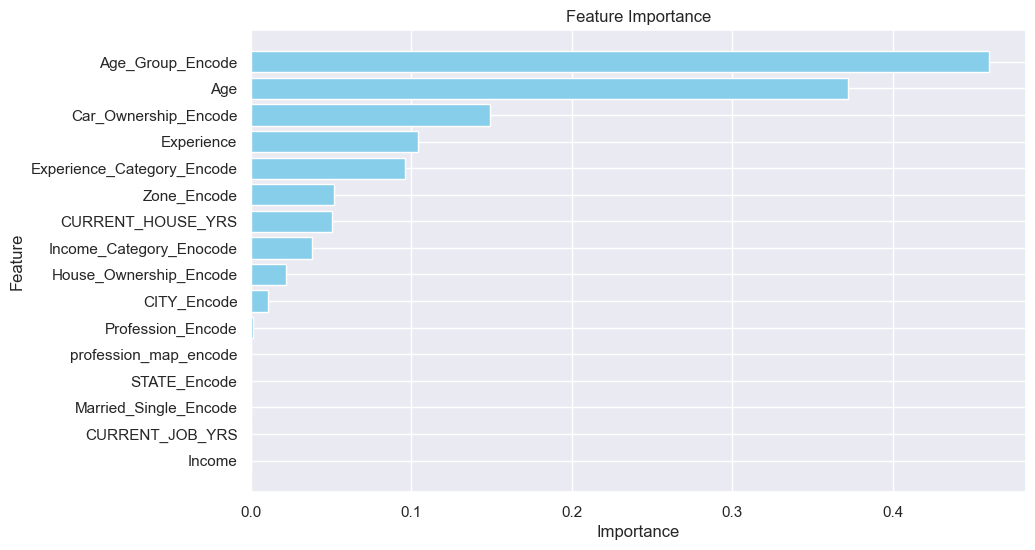

In [210]:
plt.figure(figsize=(10, 6))

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

plt.show()

### Hypertunning Parameter

#### GridSearchCV

In [188]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [189]:
logistic_model = LogisticRegression()

grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [190]:
grid_search.fit(X_train_resampled_scaled, y_train_resampled)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [191]:
best_params = grid_search.best_params_
print("Parameter terbaik:", best_params)

Parameter terbaik: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}


In [192]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.56      0.69     55208
           1       0.14      0.52      0.22      7792

    accuracy                           0.55     63000
   macro avg       0.52      0.54      0.46     63000
weighted avg       0.80      0.55      0.63     63000



### <font color = 'darkred'> Decision Tree </font>

In [ ]:
X = numeric_cols.drop(['Id', 'STATE_Encode', 'Risk_Flag', 'Experience_Category_Encode', 'profession_map_encode',
                      'Income_Category_Enocode', 'Age_Group_Encode', 'Married_Single_Encode'], axis=1)
y = numeric_cols[['Risk_Flag']]

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [27]:
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Decision Tree pada data pengujian: {:.2f}%".format(accuracy * 100))

Akurasi model Decision Tree pada data pengujian: 85.87%


In [28]:
y_train_pred = dt_model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print("Akurasi pada data pelatihan: {:.2f}%".format(train_accuracy * 100))

y_test_pred = dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Akurasi pada data pengujian: {:.2f}%".format(test_accuracy * 100))

Akurasi pada data pelatihan: 95.77%
Akurasi pada data pengujian: 85.87%


### Hypertunning Parameter

In [36]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
model = DecisionTreeClassifier()

In [37]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

#### RandomizedSearchCV

In [33]:
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100, cv=5, scoring='f1', random_state=42)

In [34]:
random_search.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='f1')

In [35]:
print("Parameter terbaik:", random_search.best_params_)

print("\nSkor validasi silang terbaik (F1-score):", random_search.best_score_)

test_score = random_search.score(X_test, y_test)
print("\nF1-score pada data pengujian:", test_score)

Parameter terbaik: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'gini'}

Skor validasi silang terbaik (F1-score): 0.904566526984617

F1-score pada data pengujian: 0.602391226177634


In [140]:
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100, cv=5, scoring='accuracy', random_state=42)

In [141]:
random_search.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy')

In [142]:
print("Parameter terbaik:", random_search.best_params_)

print("\nSkor validasi silang terbaik:", random_search.best_score_)

test_score = random_search.score(X_test, y_test)
print("\nAkurasi pada data pengujian:", test_score)

Parameter terbaik: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'criterion': 'entropy'}

Skor validasi silang terbaik: 0.9005645970925567

Akurasi pada data pengujian: 0.8594603174603175


#### GridSearchCV

In [38]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')

In [39]:
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [40]:
print("Parameter terbaik:", grid_search.best_params_)
print("\nSkor validasi silang terbaik (accuracy):", grid_search.best_score_)

test_score = grid_search.score(X_test, y_test)
print("\nAkurasi pada data pengujian:", test_score)

Parameter terbaik: {'criterion': 'entropy', 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

Skor validasi silang terbaik (accuracy): 0.9031521162469627

Akurasi pada data pengujian: 0.8596190476190476


### <font color = 'darkred'> Decision Tree </font>

In [63]:
best_params = {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 1, 
               'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'entropy'}
dt_classifier = DecisionTreeClassifier(**best_params)

In [64]:
cv_scores = cross_val_score(dt_classifier, X_train_resampled, y_train_resampled, cv=5)

In [65]:
dt_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       min_samples_split=10)

In [66]:
y_train_pred = dt_classifier.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_f1_score = f1_score(y_train_resampled, y_train_pred)

In [67]:
y_pred_test = dt_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test)

In [68]:
print("Hasil Cross-Validation:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold-{i}: {score}")

Hasil Cross-Validation:
Fold-1: 0.8797629638565118
Fold-2: 0.9081258764456641
Fold-3: 0.9046111161373986
Fold-4: 0.9056666365089417
Fold-5: 0.9046563527247504


In [69]:
mean_cv_score = cv_scores.mean()
print(f"Rata-rata skor cross-validation: {mean_cv_score}")

Rata-rata skor cross-validation: 0.9005645891346532


In [70]:
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     55208
           1       0.47      0.86      0.61      7792

    accuracy                           0.86     63000
   macro avg       0.72      0.86      0.76     63000
weighted avg       0.91      0.86      0.88     63000



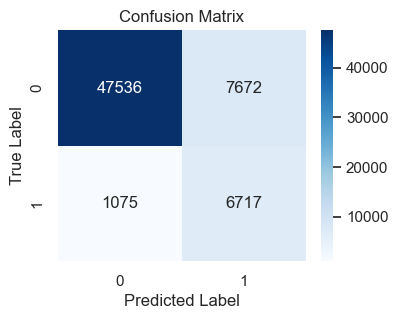

In [71]:
y_pred = dt_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [72]:
print("Akurasi pada data pelatihan:", train_accuracy)
print("\nAkurasi pada data pengujian:", test_accuracy)

Akurasi pada data pelatihan: 0.9377668942555912

Akurasi pada data pengujian: 0.8611587301587301


In [76]:
print(f"F1-Score pada data pelatihan: {train_f1_score:.2f}")
print(f"F1-Score pada data pengujian: {test_f1_score:.2f}")

F1-Score pada data pelatihan: 0.94
F1-Score pada data pengujian: 0.61


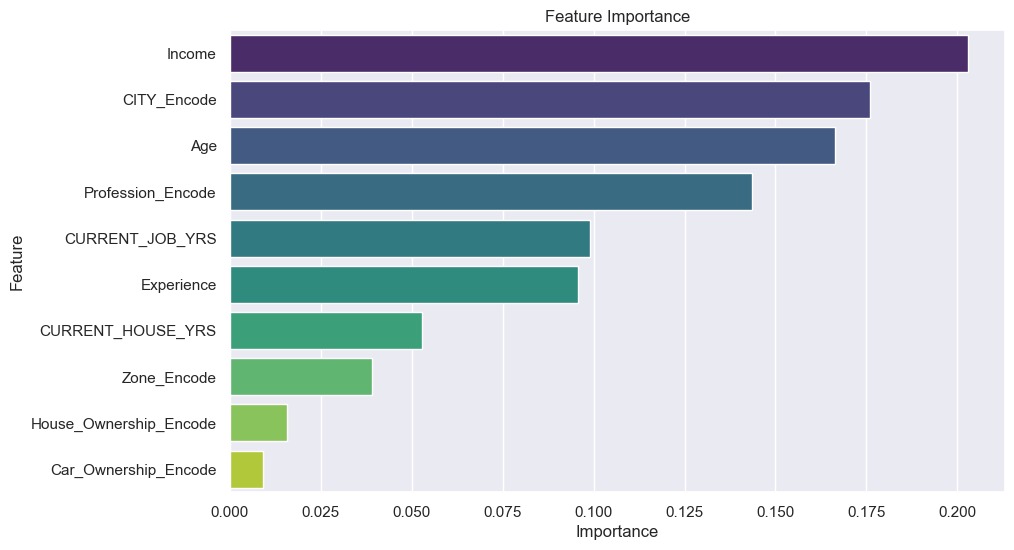

In [77]:
feature_importance = dt_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [78]:
feature_importance_df

Feature  Importance
0                  Income    0.202924
8             CITY_Encode    0.175973
1                     Age    0.166361
7       Profession_Encode    0.143653
3         CURRENT_JOB_YRS    0.098973
2              Experience    0.095590
4       CURRENT_HOUSE_YRS    0.052697
9             Zone_Encode    0.038962
6  House_Ownership_Encode    0.015751
5    Car_Ownership_Encode    0.009117

### Interpretasi

**1. Classification Report:**
- Akurasi pada data pelatihan yang tinggi (sekitar 0.93) dan pada data testing (sekitar 0.86) menunjukkan bahwa model berhasil mempelajari pola yang ada dalam data pelatihan dan data testing dengan baik. 

**2. Cross Validation:**
- Nilai rata-rata Cross-Validation adalah sekitar 0.9, yang menunjukkan bahwa model cenderung mempertahankan kinerja yang baik secara konsisten pada data yang tidak terlihat.
- Hal ini memberikan keyakinan kepada bisnis bahwa model memiliki kemampuan yang baik untuk menggeneralisasi dan mampu memprediksi risiko kredit dengan akurat pada data baru yang belum pernah dilihat sebelumnya.

**3. Feature Importance:**
- Fitur penting menunjukkan seberapa besar kontribusi masing-masing fitur dalam membuat prediksi pada model.
- Dalam kasus ini, fitur-fitur seperti pendapatan (Income), kota (CITY_Encode), dan usia (Age) memiliki pengaruh yang paling signifikan dalam memprediksi risiko kredit.
- Hal ini menunjukkan bahwa variabel-variabel ini berperan penting dalam mempengaruhi hasil prediksi, dan oleh karena itu, bisnis dapat memfokuskan strategi mereka lebih dalam pada variabel-variabel ini dalam mengelola risiko kredit dan meningkatkan keputusan bisnis mereka.

### <font color = 'darkred'> Random Forest </font>

In [41]:
X = numeric_cols.drop(['Id', 'Risk_Flag'], axis=1)
y = numeric_cols[['Risk_Flag']]

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [65]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [44]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [45]:
cv_scores = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy') 

In [46]:
rf_classifier.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [47]:
y_pred_train = rf_classifier.predict(X_resampled)
y_pred_test = rf_classifier.predict(X_test)

train_accuracy = accuracy_score(y_resampled, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [48]:
print("Akurasi pada data pelatihan:", train_accuracy)
print("Akurasi pada data pengujian:", test_accuracy)

Akurasi pada data pelatihan: 0.9577402349875751
Akurasi pada data pengujian: 0.8846666666666667


In [49]:
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     55208
           1       0.52      0.80      0.63      7792

    accuracy                           0.88     63000
   macro avg       0.75      0.85      0.78     63000
weighted avg       0.91      0.88      0.89     63000



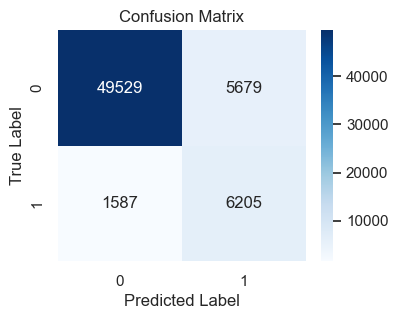

In [60]:
y_pred = rf_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [50]:
print("Hasil Cross-Validation:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold-{i}: {score}")

Hasil Cross-Validation:
Fold-1: 0.8841659253004418
Fold-2: 0.9465613172695607
Fold-3: 0.9458216472149341
Fold-4: 0.9463644862631563
Fold-5: 0.9463946439880575


In [51]:
mean_cv_score = cv_scores.mean()
print(f"Rata-rata skor cross-validation: {mean_cv_score}")

Rata-rata skor cross-validation: 0.9338616040072301


In [52]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

print("Fitur:")
for f in range(X_resampled.shape[1]):
    print(f"{f + 1}. Fitur {X_resampled.columns[indices[f]]}: {importances[indices[f]]}")

Fitur:
1. Fitur Income: 0.1334567178170693
2. Fitur CITY_Encode: 0.12489858948866425
3. Fitur Age: 0.11486214702062136
4. Fitur Profession_Encode: 0.10708899116796004
5. Fitur STATE_Encode: 0.07862527612249727
6. Fitur Experience: 0.07800604837832573
7. Fitur profession_map_encode: 0.0726083060755748
8. Fitur CURRENT_JOB_YRS: 0.06864527523859956
9. Fitur CURRENT_HOUSE_YRS: 0.04781527568593691
10. Fitur Zone_Encode: 0.04310399119213236
11. Fitur Income_Category_Enocode: 0.03514105528500807
12. Fitur Experience_Category_Encode: 0.029621830820409128
13. Fitur Age_Group_Encode: 0.028349787901657857
14. Fitur House_Ownership_Encode: 0.012812883940875248
15. Fitur Car_Ownership_Encode: 0.012555364146193017
16. Fitur Married_Single_Encode: 0.012408459718475168


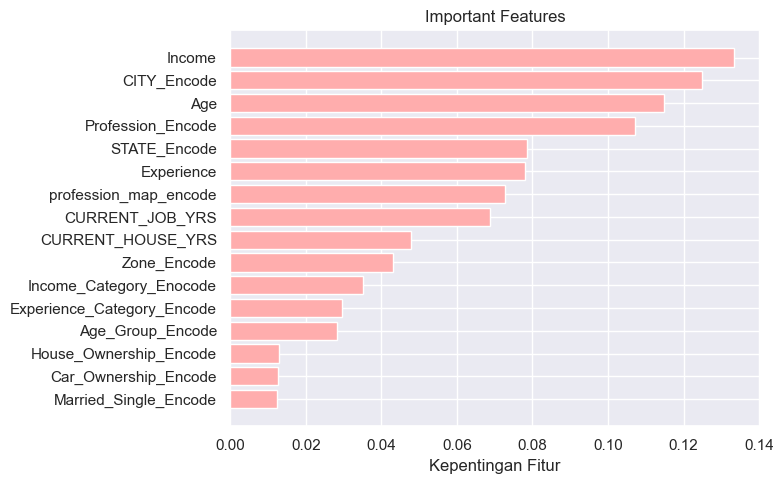

In [64]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1] 

plt.figure(figsize=(8, 5))
plt.title("Important Features")
plt.barh(range(X_resampled.shape[1]), importances[indices], align='center', color='#ffadad')
plt.yticks(range(X_resampled.shape[1]), X_resampled.columns[indices])
plt.xlabel('Kepentingan Fitur')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

In [54]:
from sklearn.metrics import roc_curve, auc

# Menghitung probabilitas prediksi untuk kelas positif pada data pelatihan dan pengujian
y_prob_train = rf_classifier.predict_proba(X_resampled)[:, 1]
y_prob_test = rf_classifier.predict_proba(X_test)[:, 1]

# Menghitung FPR, TPR, dan threshold pada data pelatihan dan pengujian
fpr_train, tpr_train, thresholds_train = roc_curve(y_resampled, y_prob_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_prob_test)

# Menghitung area di bawah kurva ROC (ROC-AUC)
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)


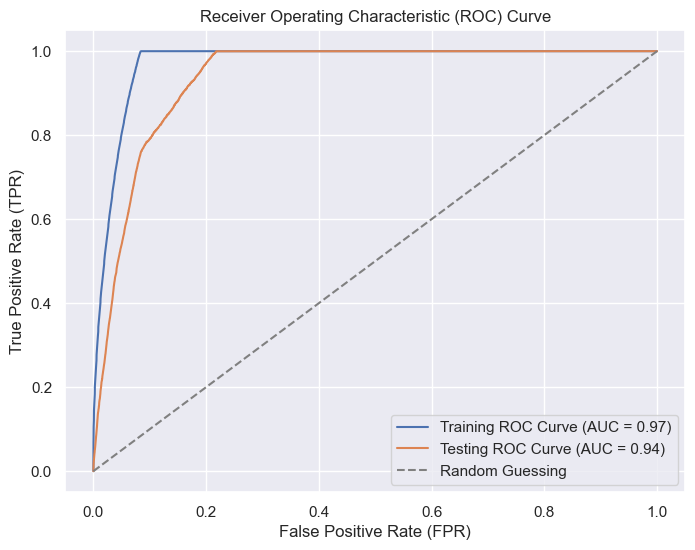

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC Curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

#### RandomizedSearchCV

In [65]:
from scipy.stats import randint

param_dist = {
    'n_estimators':[100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1, 2, 3, 4, 5, None],
    'bootstrap': [True, False]
}

In [66]:
from sklearn.model_selection import RandomizedSearchCV

rf_classifier = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

In [67]:
random_search.fit(X_resampled, y_resampled)

KeyboardInterrupt: 

In [ ]:
best_rf_classifier = random_search.best_estimator_
print("\nParameter terbaik:", random_search.best_params_)

In [ ]:
y_pred_train = best_rf_classifier.predict(X_resampled)
y_pred_test = best_rf_classifier.predict(X_test)

train_accuracy = accuracy_score(y_resampled, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [16]:
model_ML = {
    'Evaluation':['Train Accuracy', 'Test Accuracy', 'Avg F1-Score', 'Avg CV-Score'],
    'Logistic': ['57.6%', '55.4%', '46%', '57.5%'],
    'XGBoost': ['89.3%', '87%', '75%', ''],
    'DecisionTree': ['93.8%', '86.1%', '76%', '90.1%'],
    'RandomForest': ['95.8%', '88.5%', '78%', '93.4%']
}

df_eval_model = pd.DataFrame(model_ML)
df_eval_model

Evaluation Logistic XGBoost DecisionTree RandomForest
0  Train Accuracy    57.6%   89.3%        93.8%        95.8%
1   Test Accuracy    55.4%     87%        86.1%        88.5%
2    Avg F1-Score      46%     75%          76%          78%
3    Avg CV-Score    57.5%                90.1%        93.4%